## Importing the relevant libraries

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, joblib
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV, ElasticNetCV, PassiveAggressiveRegressor, SGDRegressor, ARDRegression, RANSACRegressor, TweedieRegressor, HuberRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import probplot
from sklearn.feature_selection import SelectKBest, SelectFromModel, SelectPercentile, f_regression, r_regression, RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow_addons.metrics import RSquare

In [2]:
plt.rcParams['figure.figsize'] = (12,8) # Overwriting the default figure size

## Loading the dataset

In [3]:
train = pd.read_csv('train.csv')
train_copy = train.copy()
train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

## Understanding the features and dimensions of the dataset

In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

## Exploratory Data Analysis

Skewness: 0.0030655518513462644
Kurtosis: -1.1955007812357379


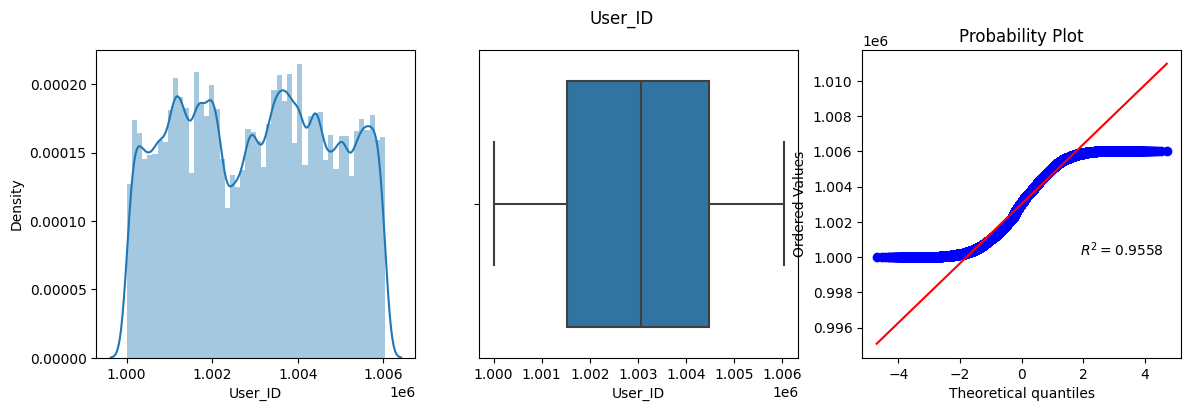

Skewness: 0.40014010986184784
Kurtosis: -1.21611364874086


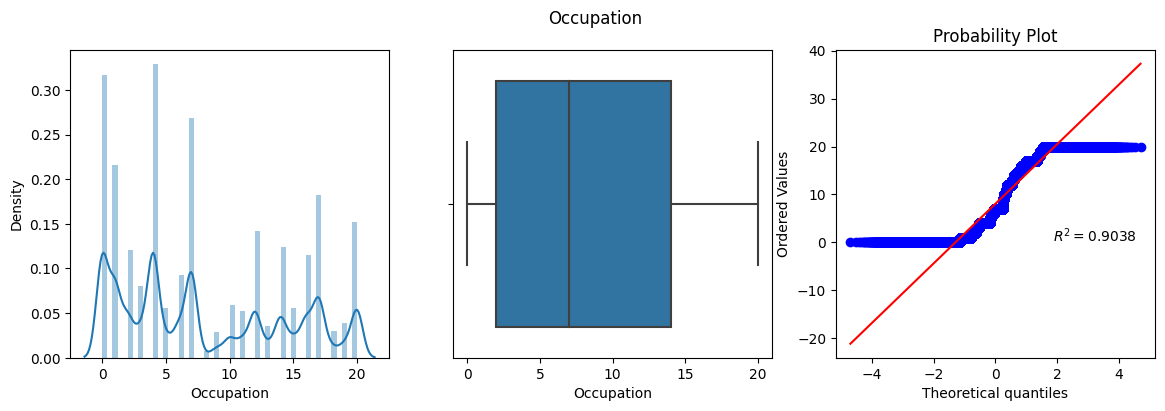

Skewness: 0.3674372854404167
Kurtosis: -1.8649966222489232


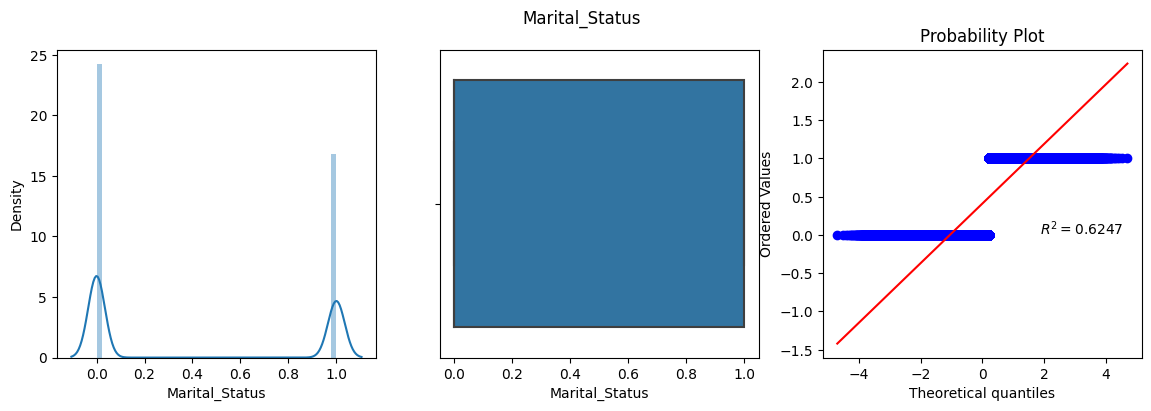

Skewness: 1.0257349338538029
Kurtosis: 1.2347569716913842


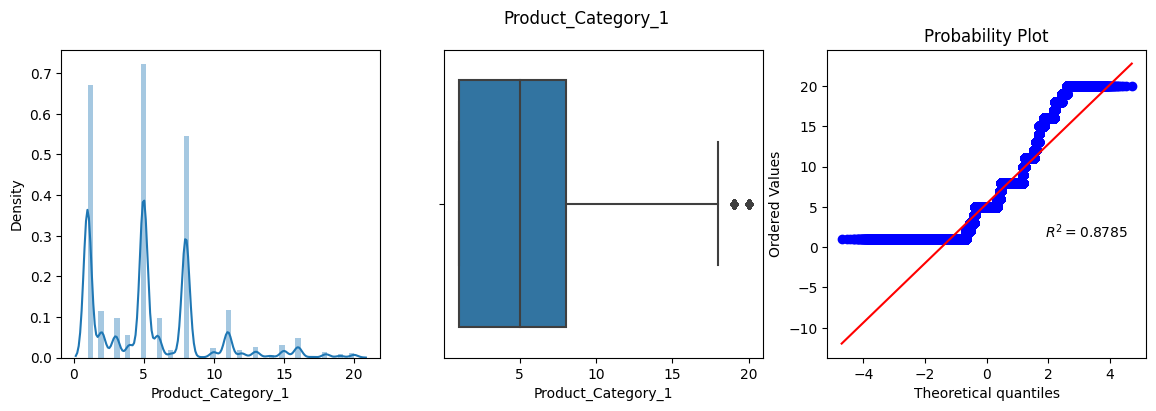

Skewness: -0.1627577144156097
Kurtosis: -1.4322668993429908


posx and posy should be finite values
posx and posy should be finite values


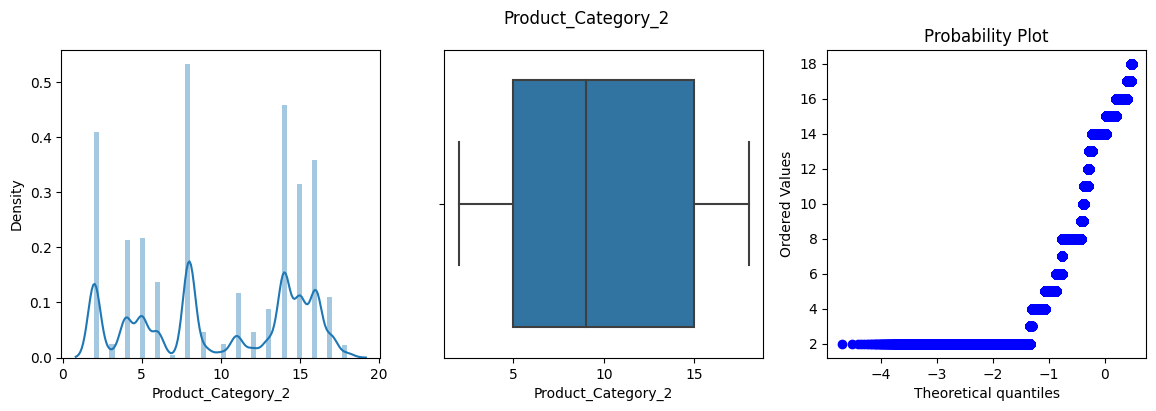

Skewness: -0.7654458894373977
Kurtosis: -0.8080661150996602


posx and posy should be finite values
posx and posy should be finite values


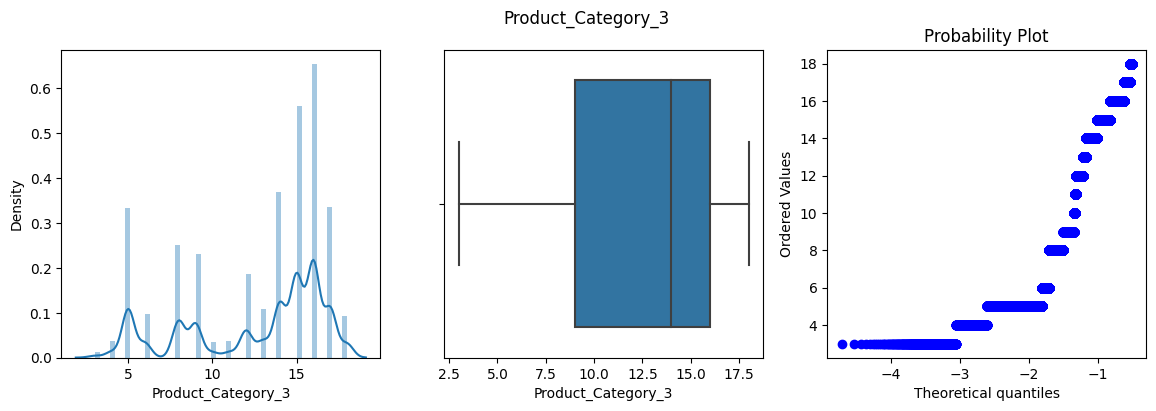

Skewness: 0.6001400037087128
Kurtosis: -0.3383775655851702


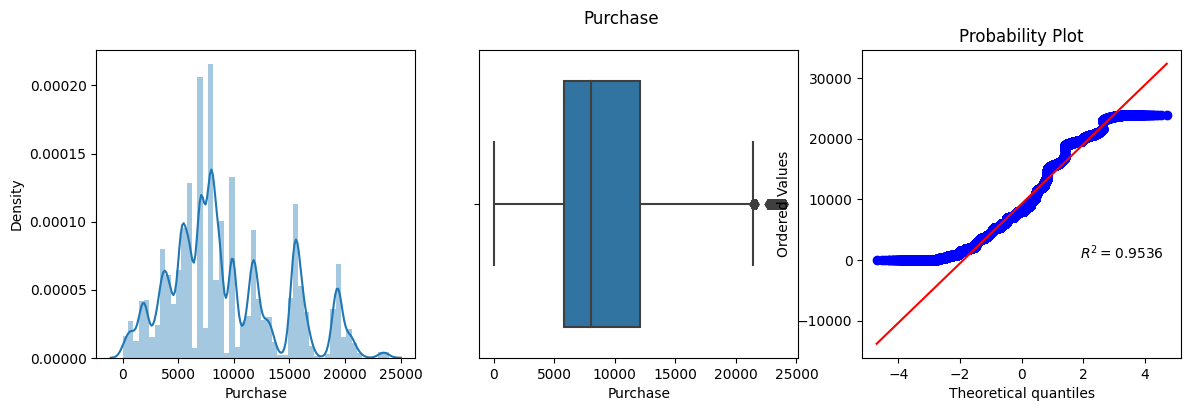

In [10]:
for col in train.select_dtypes(np.number):
        print("Skewness:".format(col),train[col].skew())
        print("Kurtosis:".format(col),train[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(train[col])
        plt.subplot(132)
        sns.boxplot(train[col])
        plt.subplot(133)
        probplot(train[col],rvalue=True,plot=plt)
        plt.suptitle(col)
        plt.show();

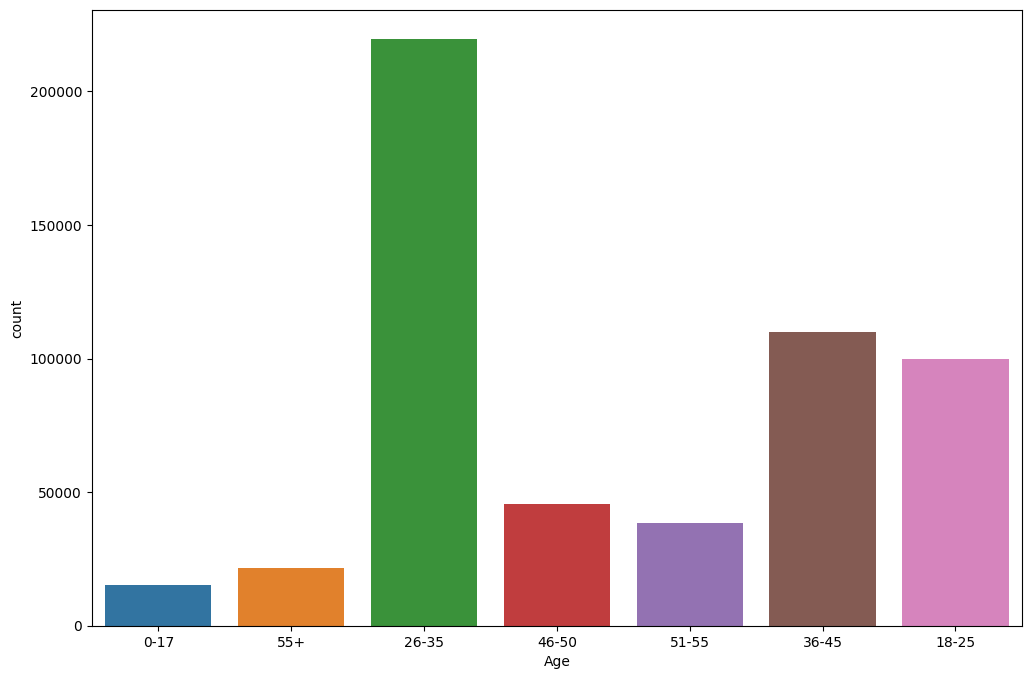

In [11]:
sns.countplot(train['Age']);

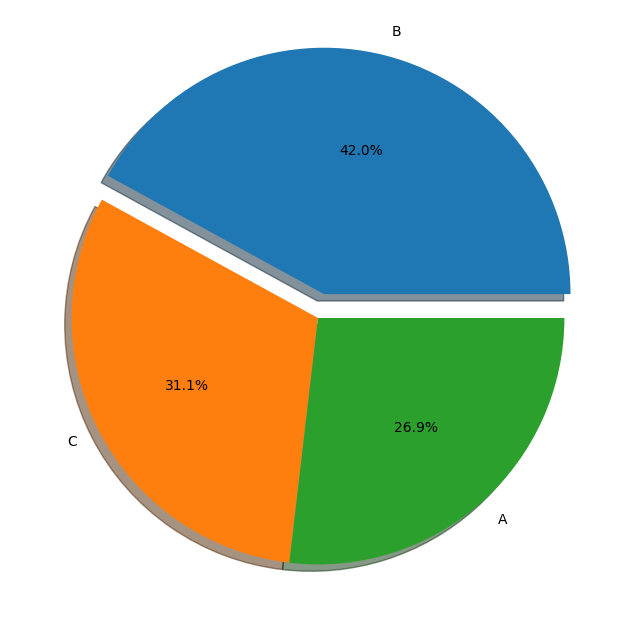

In [12]:
plt.figure(figsize=(12,8))
values = train['City_Category'].value_counts().values
labels = train['City_Category'].value_counts().keys()
explode = (0.1,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%');

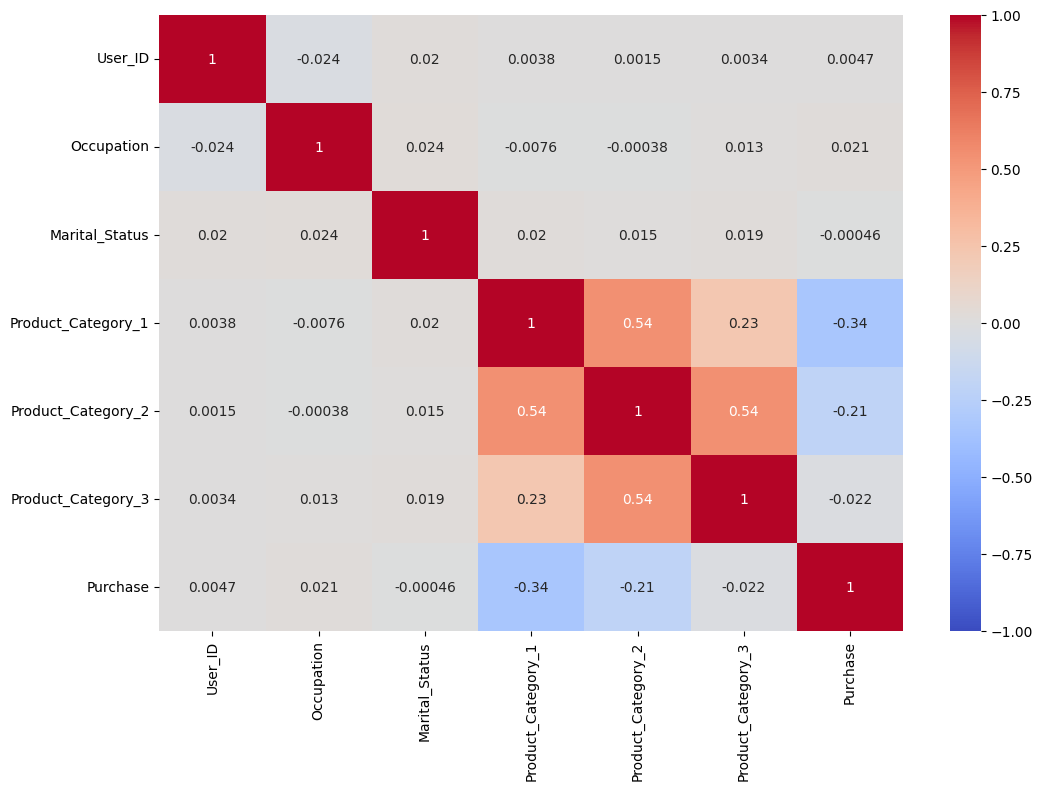

In [13]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1);

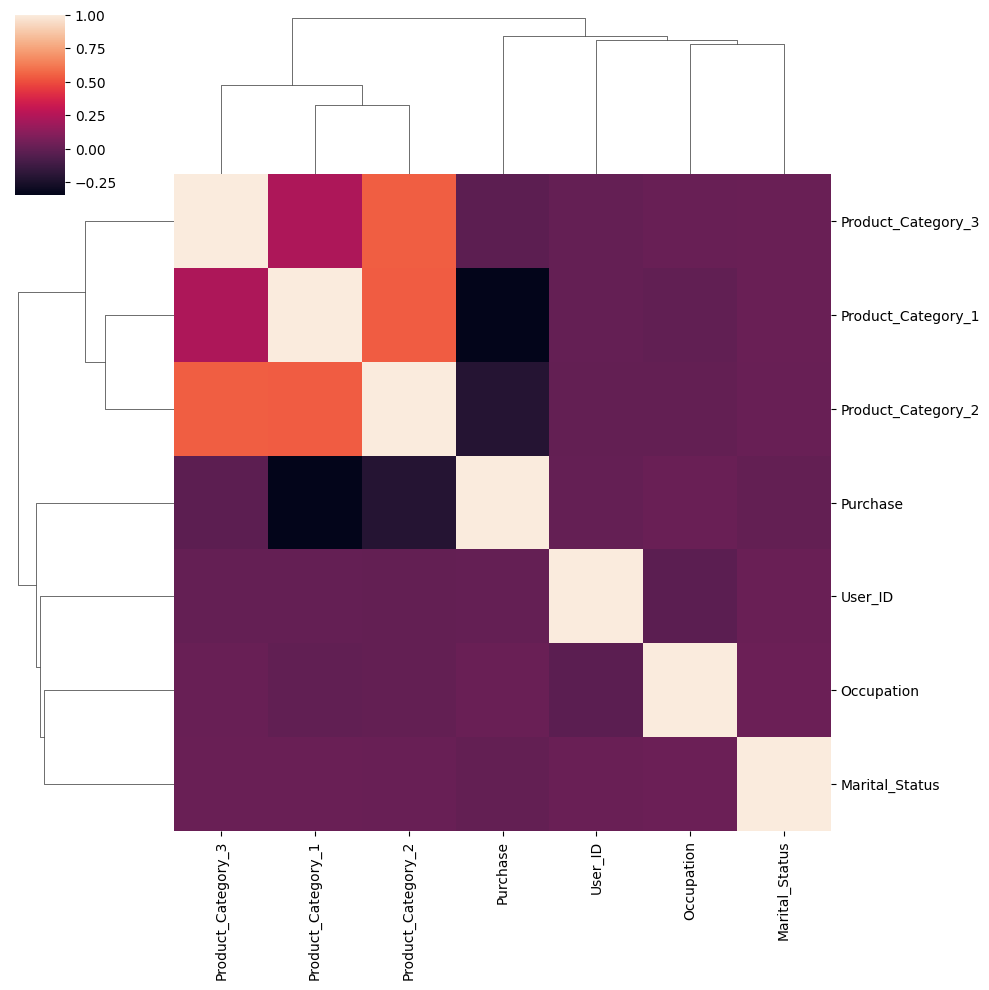

In [14]:
sns.clustermap(train.corr());

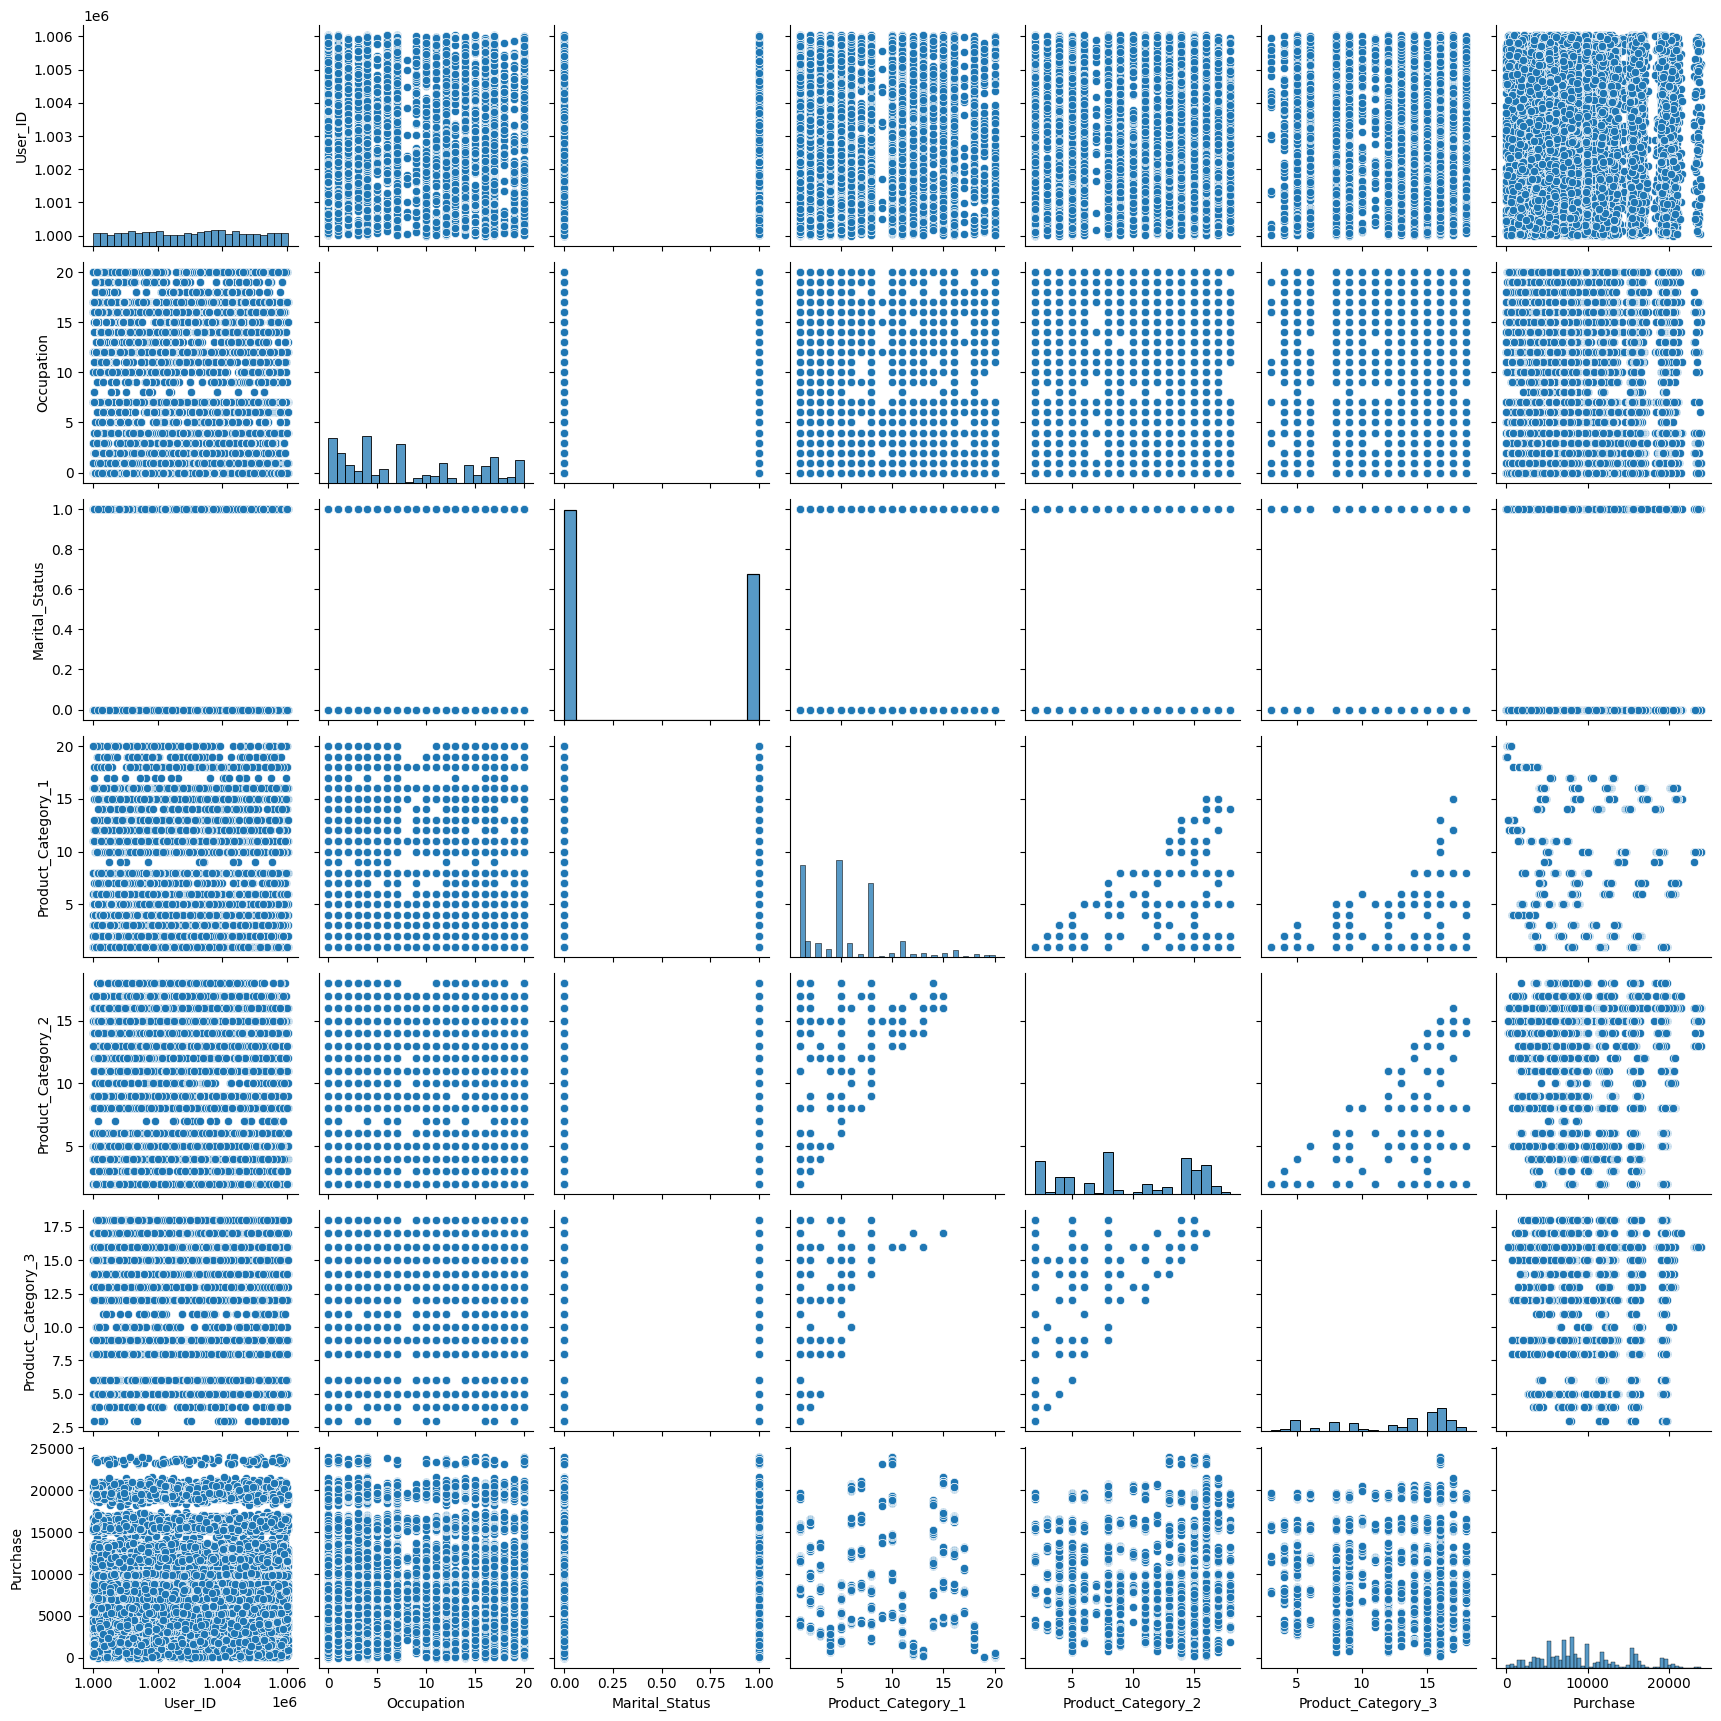

In [15]:
sns.pairplot(train.sample(20000),palette='winter');

## Feature Engineering

### Missing Values Imputation

In [16]:
train.Product_Category_2.isna().sum() / len(train.Product_Category_2)

0.3156664266963357

In [17]:
train.Product_Category_3.isna().sum() / len(train.Product_Category_3)

0.6967265865311197

In [18]:
# Using Iterative Imputation technique to impute the missing values of features
imputer = IterativeImputer()
missing_cols = ['Product_Category_2','Product_Category_3']

for col in missing_cols:
    train[col] = imputer.fit_transform(train[[col]])

### Treatment of Outliers

In [19]:
def remove_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [20]:
outlier_cols = ['Purchase','Product_Category_1']

for col in outlier_cols:
    train[col] = remove_outliers(train,col)

### Feature Transformation

Skewness: 0.0030655518513462644
Kurtosis: -1.1955007812357379


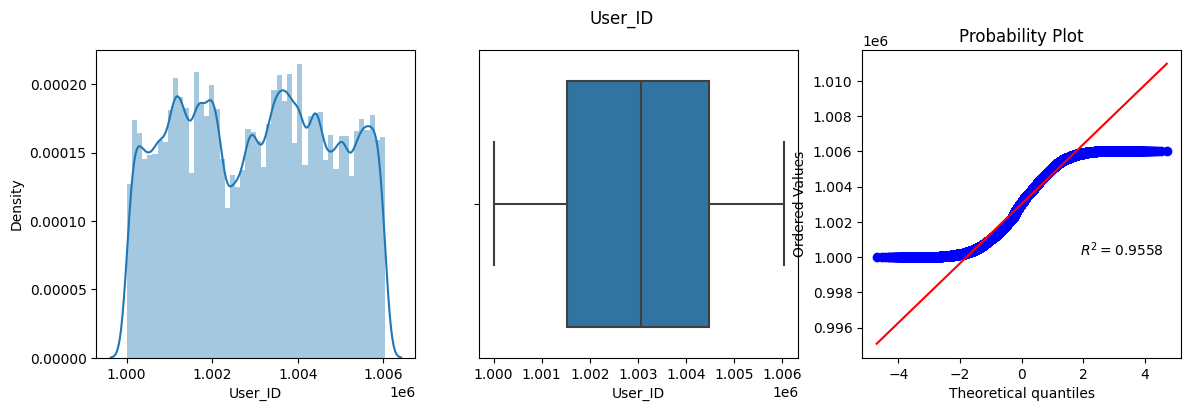

Skewness: 0.40014010986184784
Kurtosis: -1.21611364874086


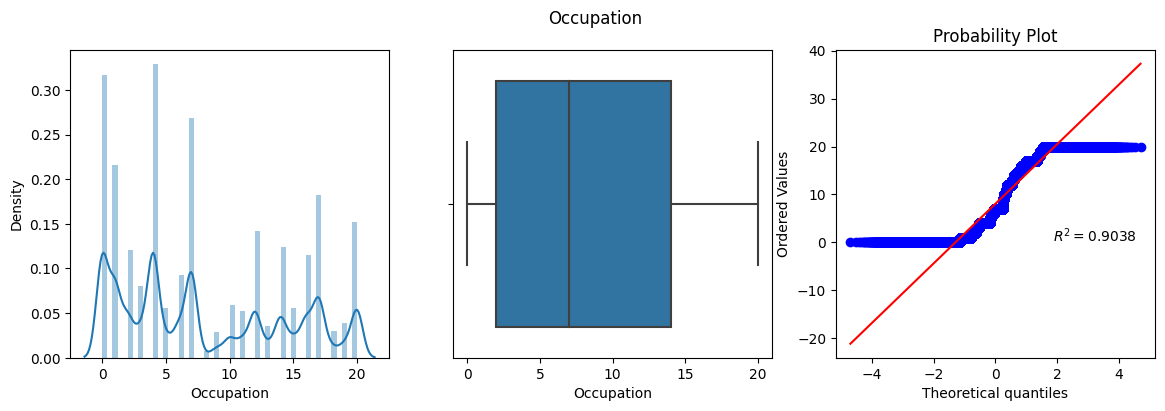

Skewness: 0.3674372854404167
Kurtosis: -1.8649966222489232


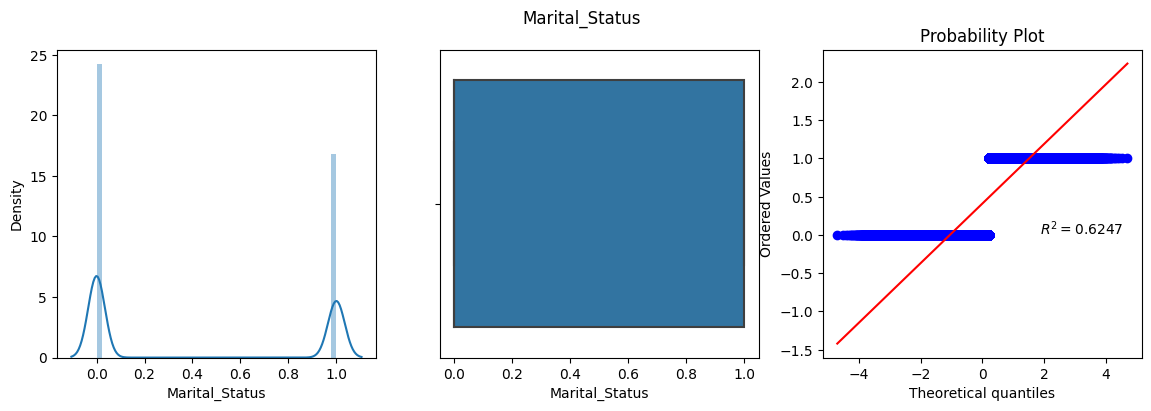

Skewness: 0.9754247200563484
Kurtosis: 0.9952049593382419


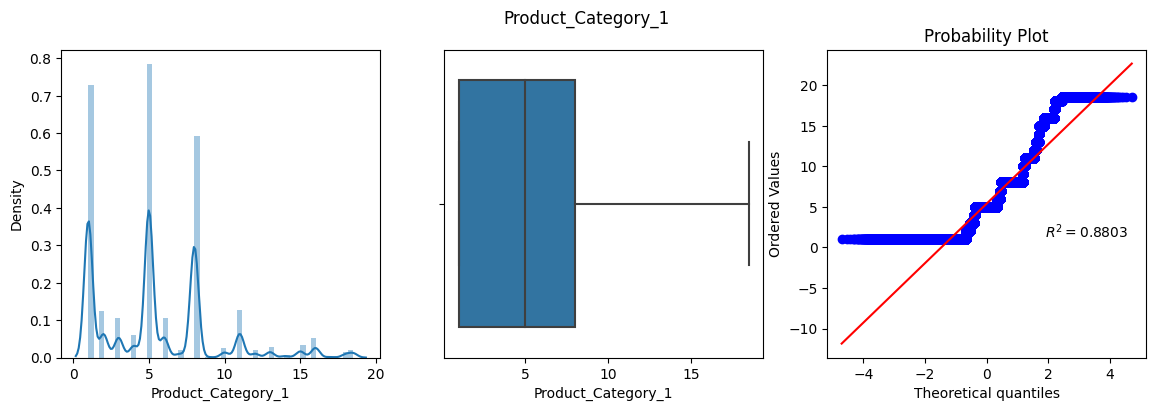

Skewness: -0.19674654415192747
Kurtosis: -0.7091007945191348


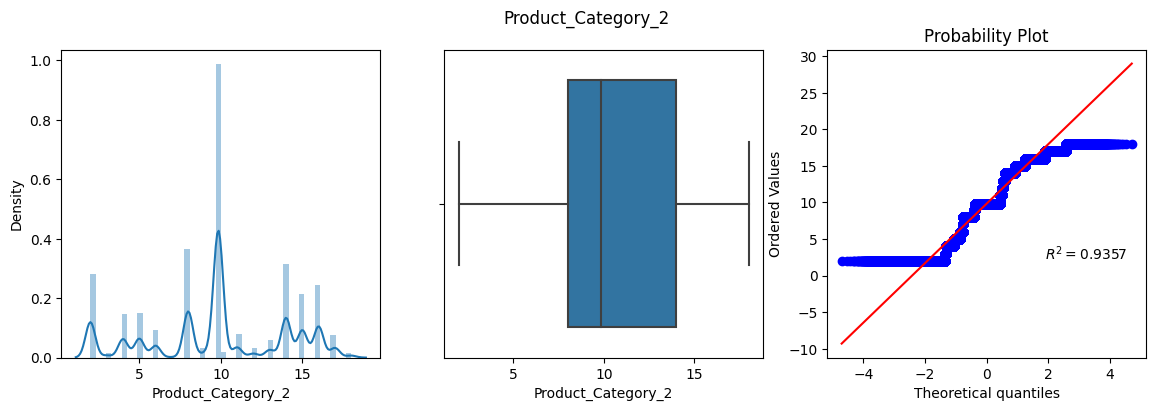

Skewness: -1.3899353636558347
Kurtosis: 4.227593988084336


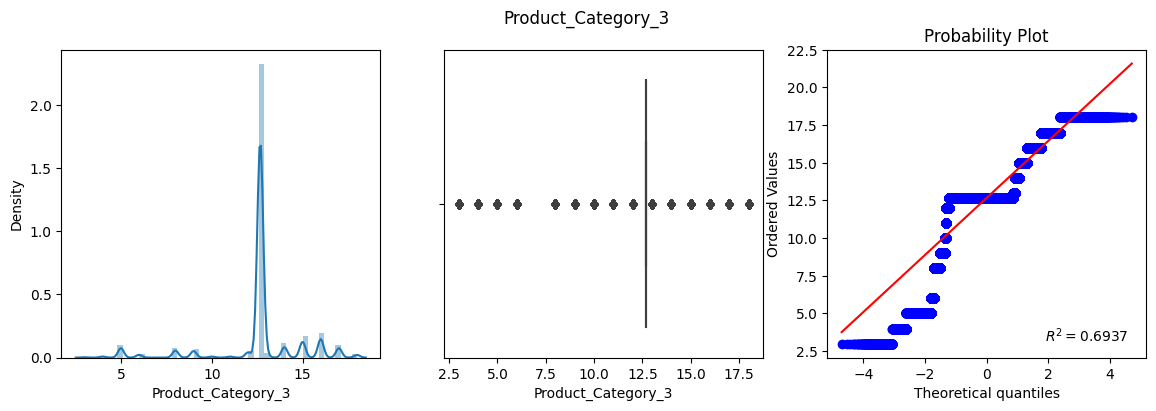

Skewness: 0.5765871650473653
Kurtosis: -0.4160743828298181


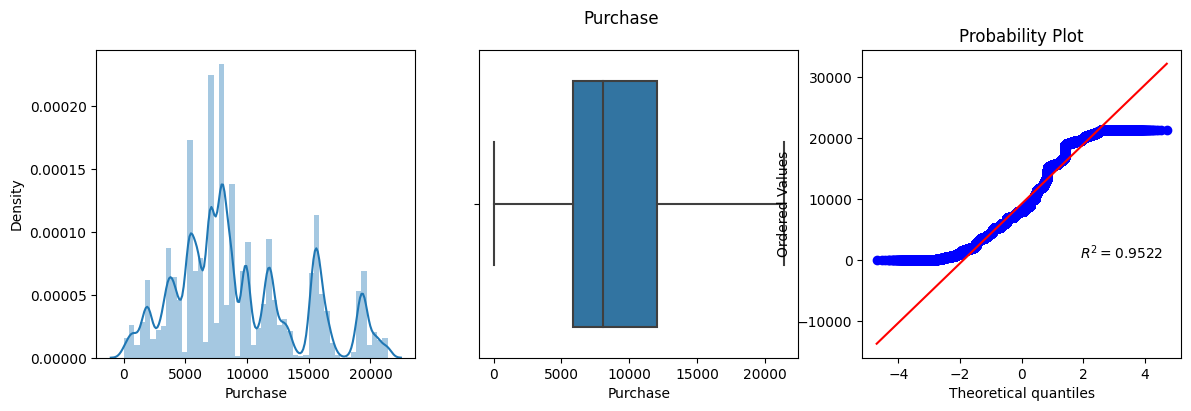

In [21]:
for col in train.select_dtypes(np.number):
        print("Skewness:".format(col),train[col].skew())
        print("Kurtosis:".format(col),train[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(train[col])
        plt.subplot(132)
        sns.boxplot(train[col])
        plt.subplot(133)
        probplot(train[col],rvalue=True,plot=plt)
        plt.suptitle(col)
        plt.show();

Left Skewed Distribution: Product_Category_3 <br>
Right Skewed Distribution: Purchase, Product_Category_1 <br>
Normal Distribution: Product_Category_2, Occupation, User_ID

In [22]:
def apply_transform(transform,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(train[col])
    plt.subplot(132)
    sns.boxplot(train[col])
    plt.subplot(133)
    probplot(train[col],rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f'{col} Before Transform')
    plt.show()
    col_tf = transform.fit_transform(train[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f'{col} After Transform')
    plt.show();

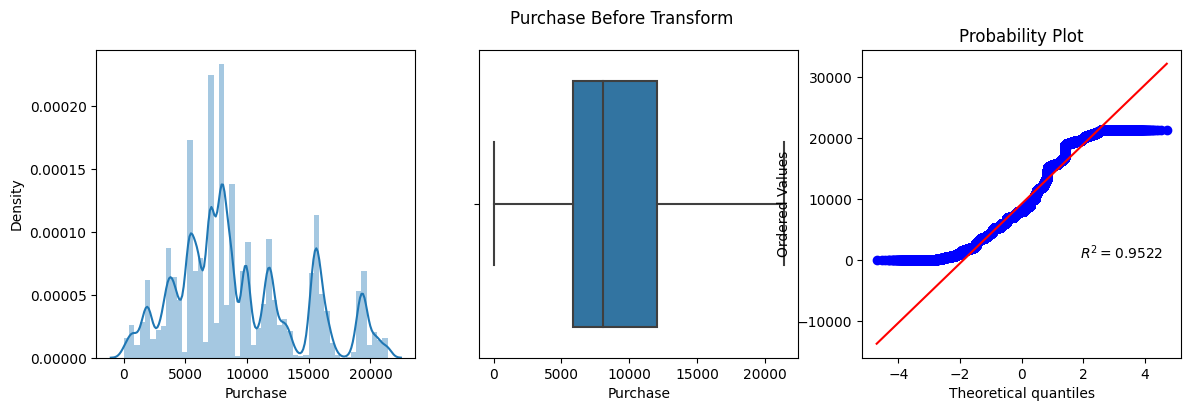

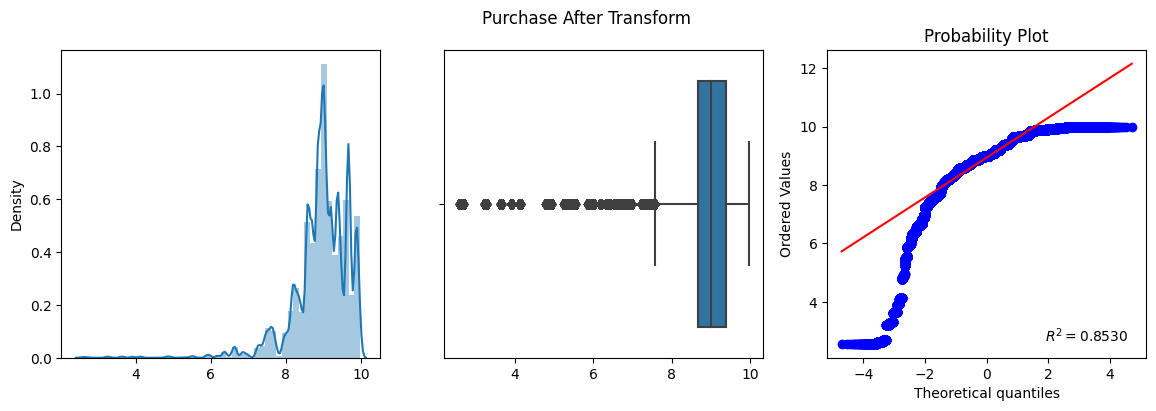

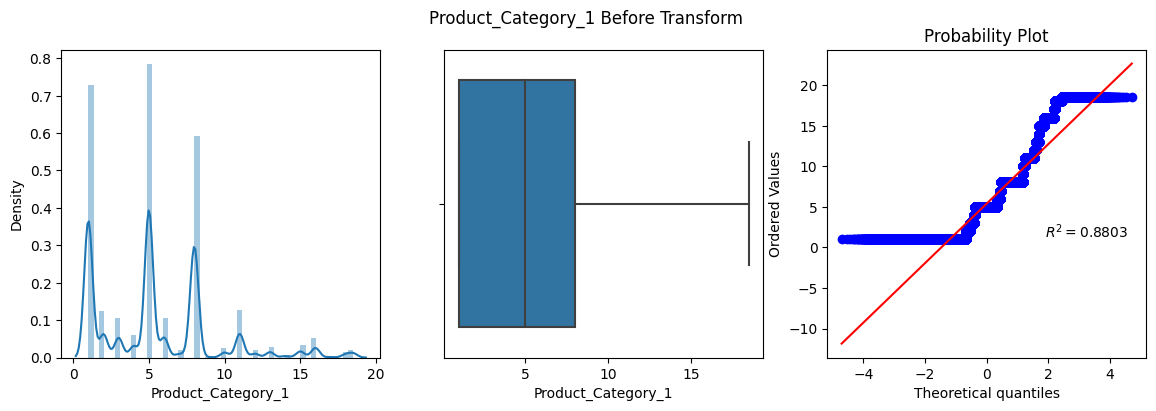

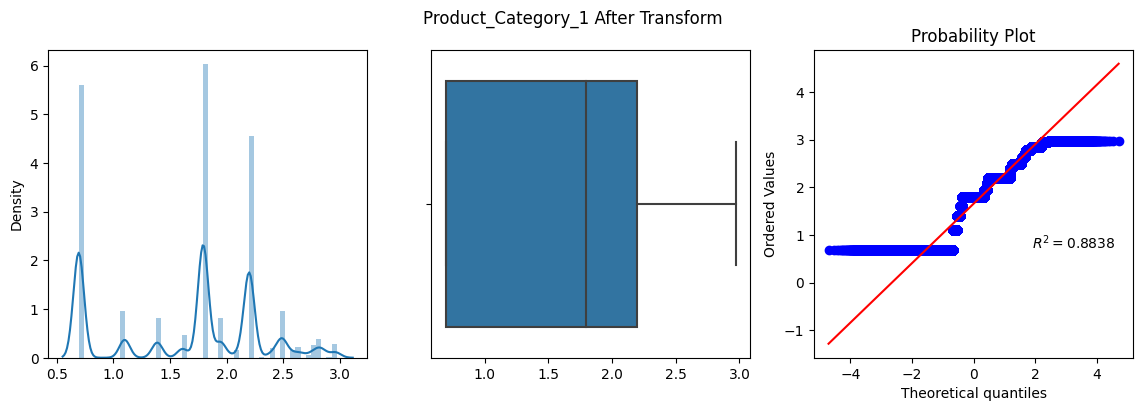

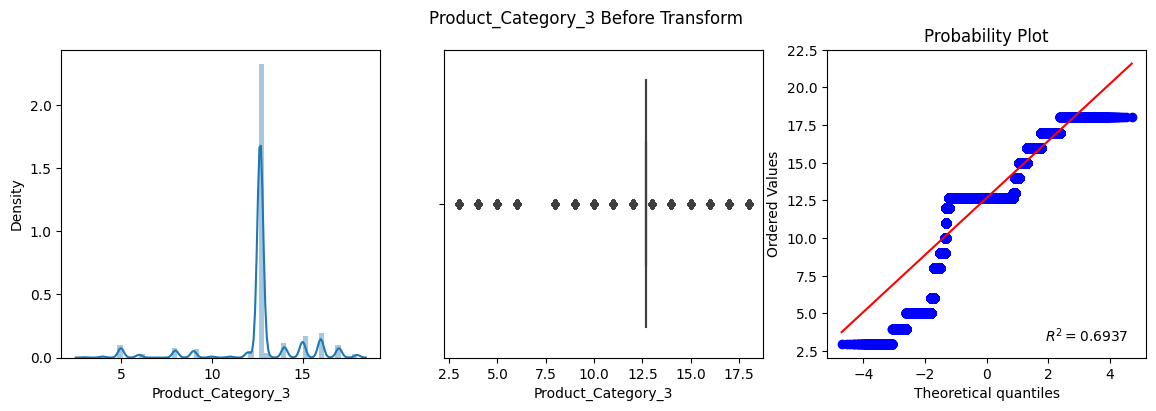

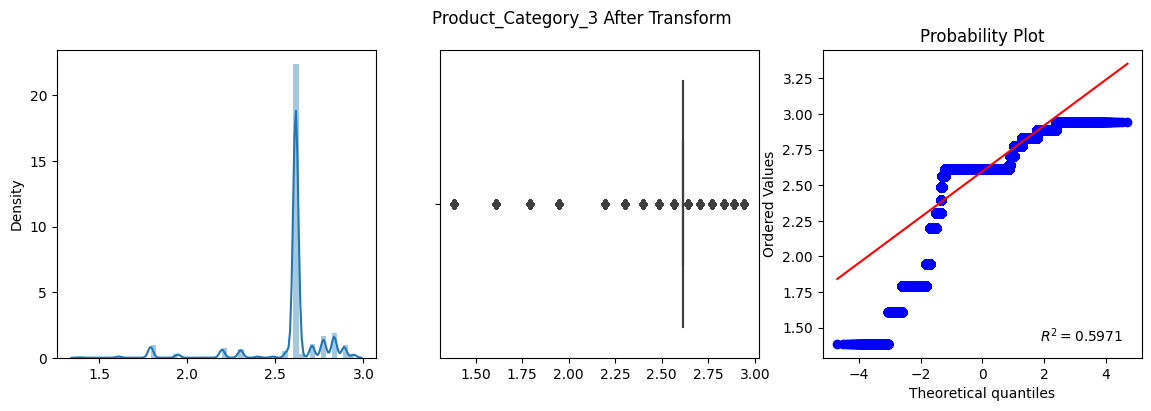

In [23]:
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(FunctionTransformer(np.log1p),col)

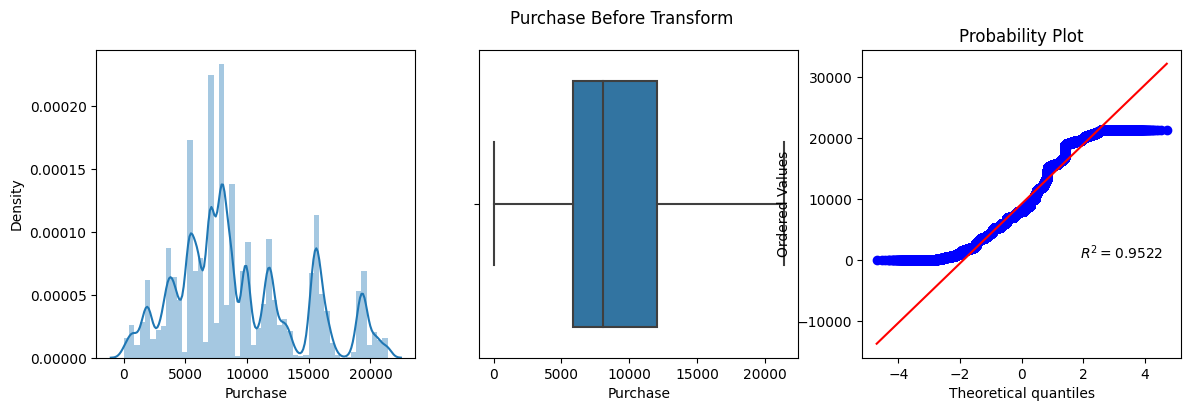

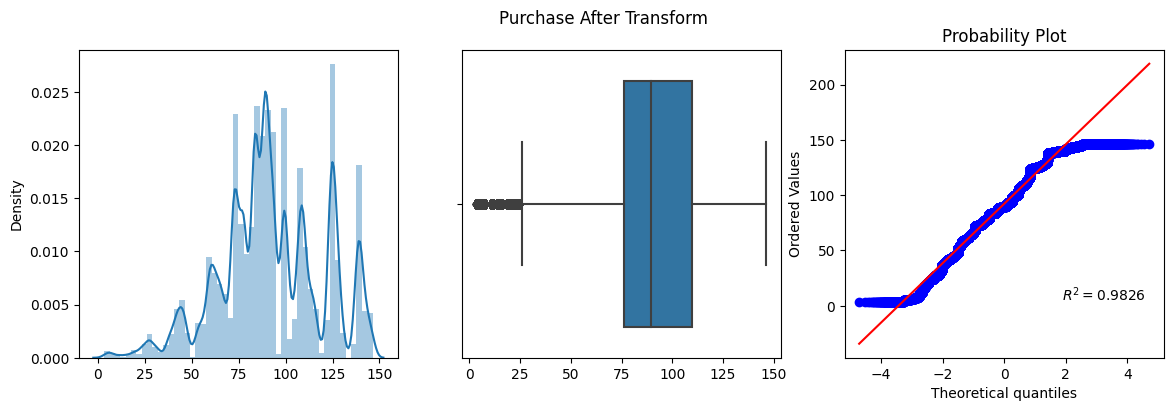

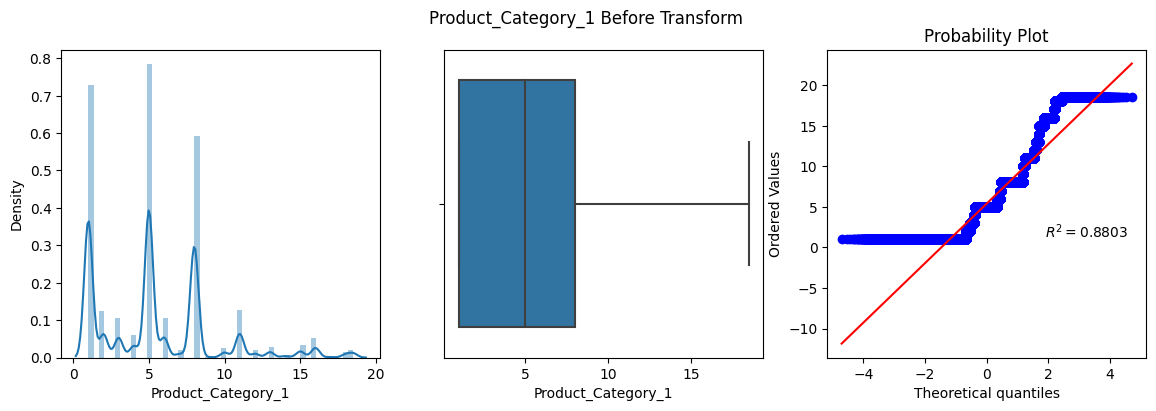

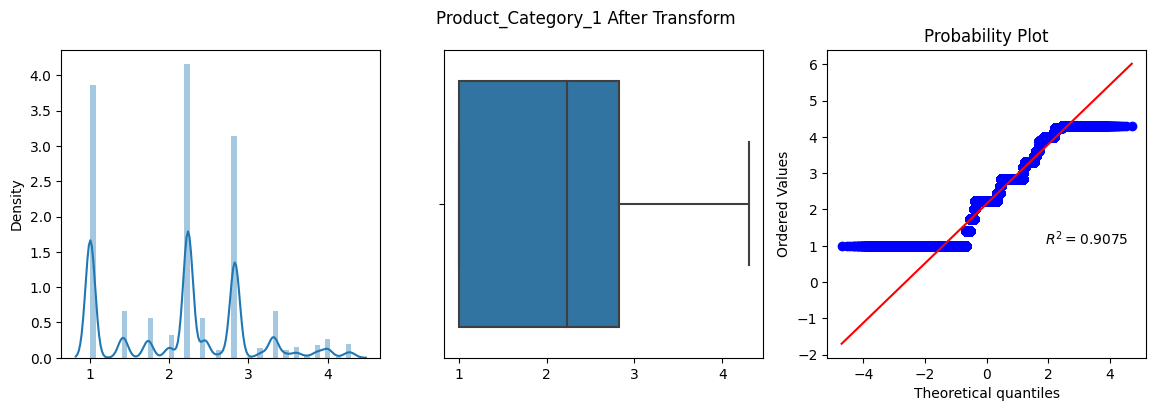

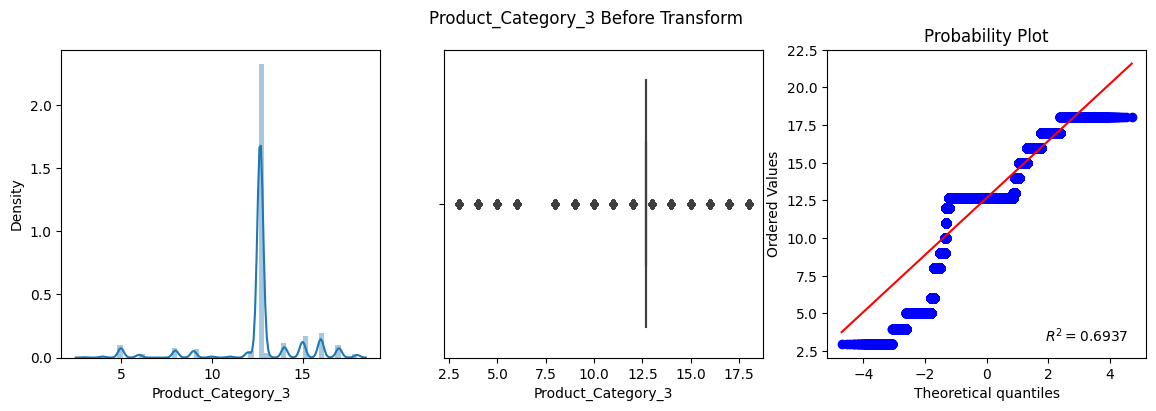

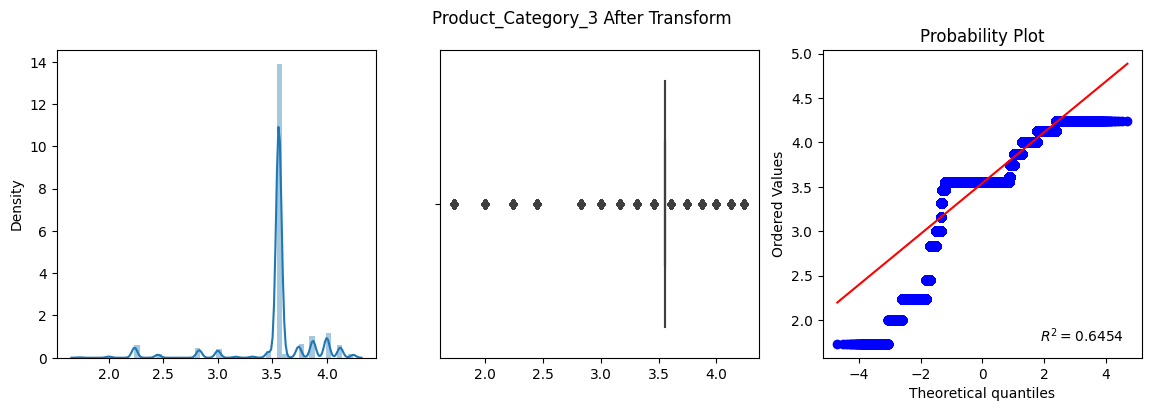

In [24]:
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(FunctionTransformer(np.sqrt),col)

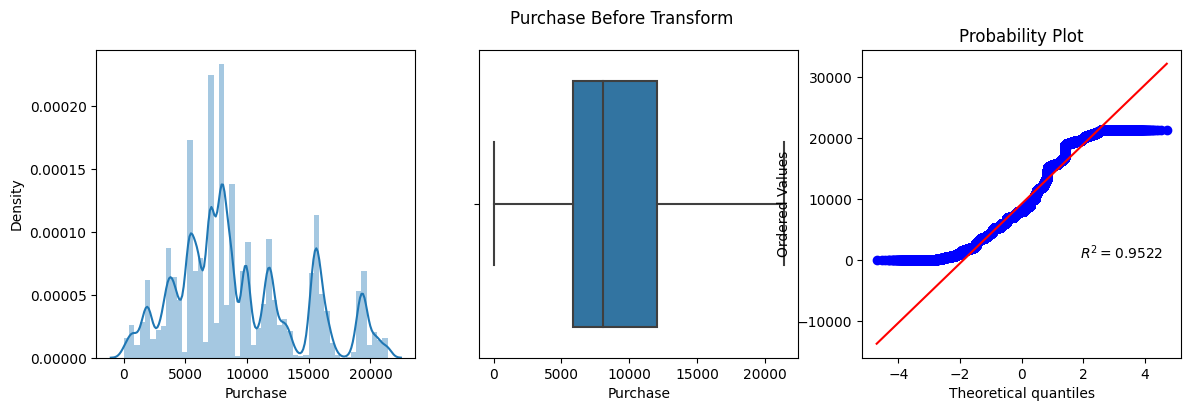

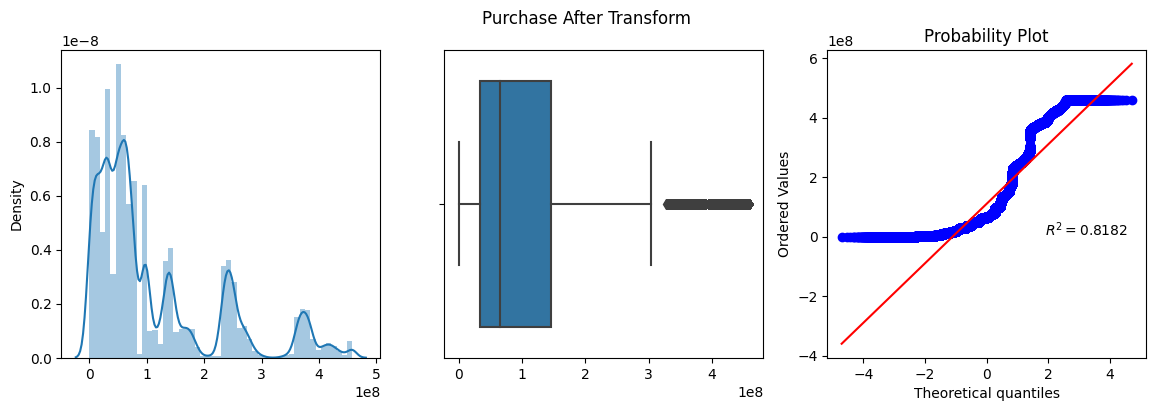

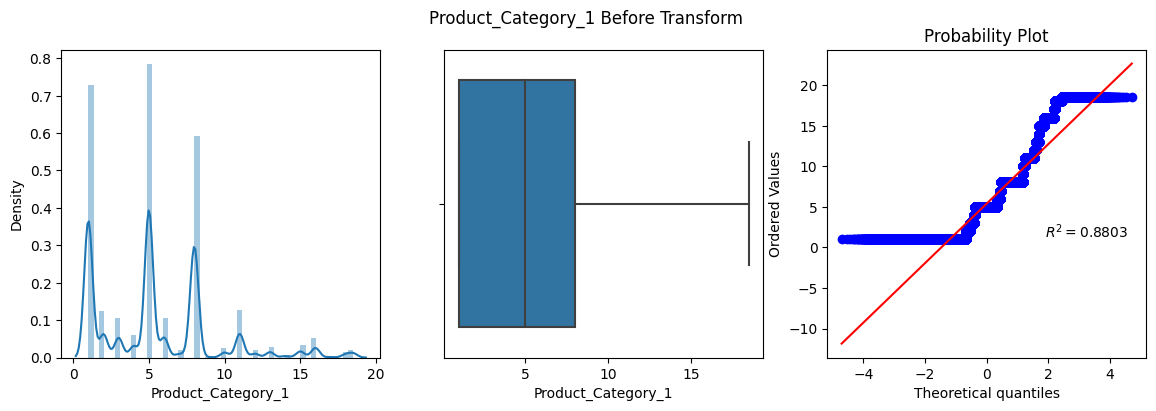

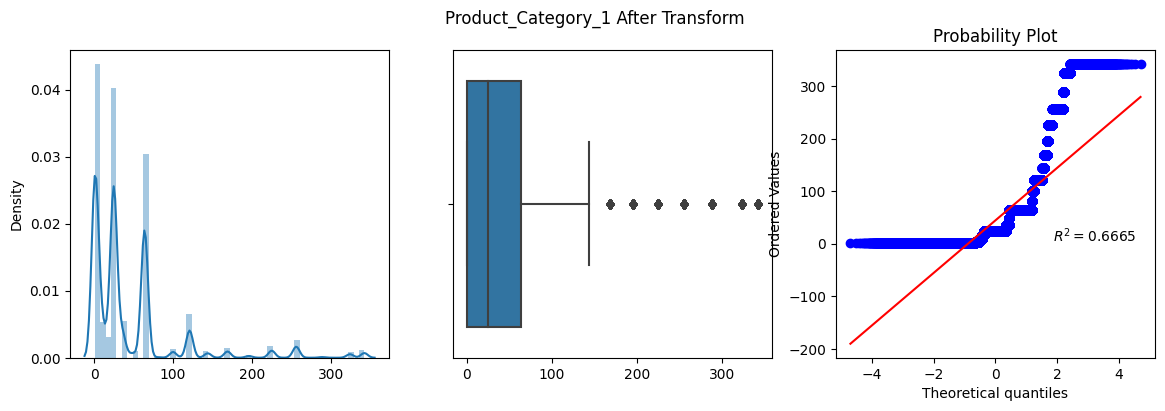

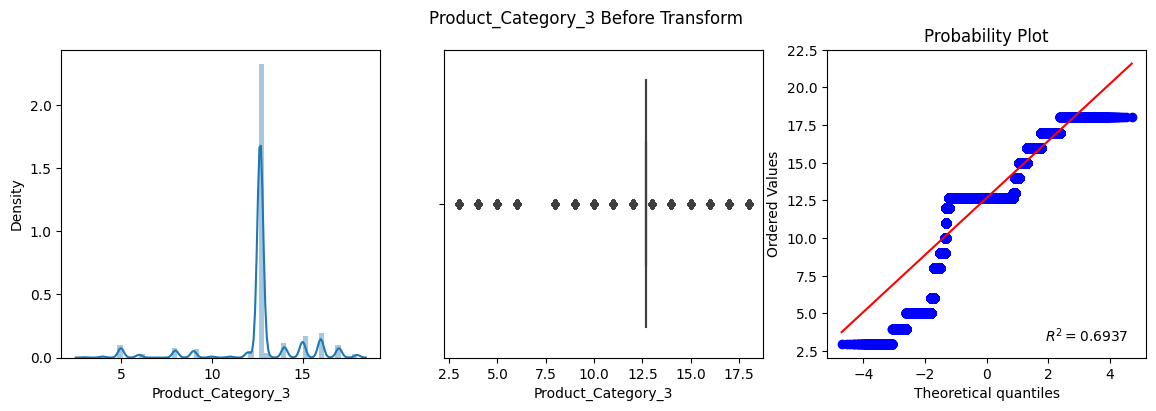

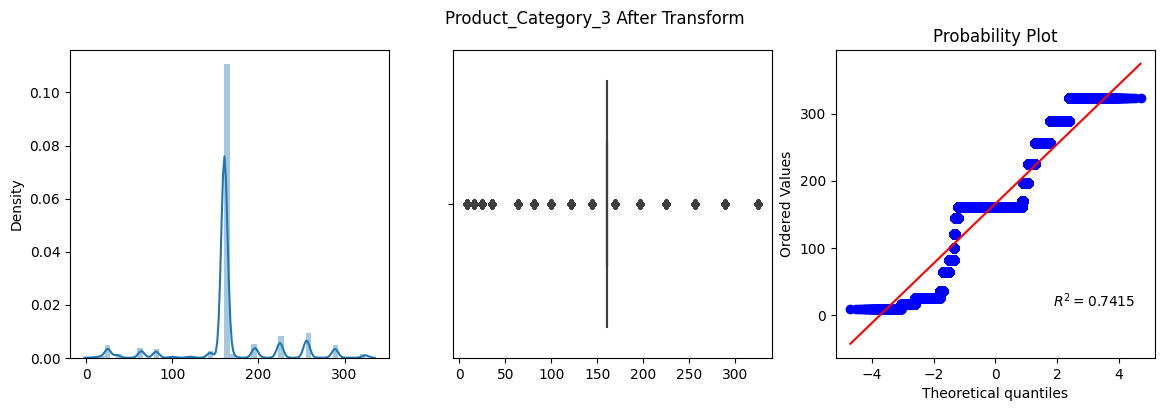

In [25]:
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(FunctionTransformer(lambda x: x**2),col)

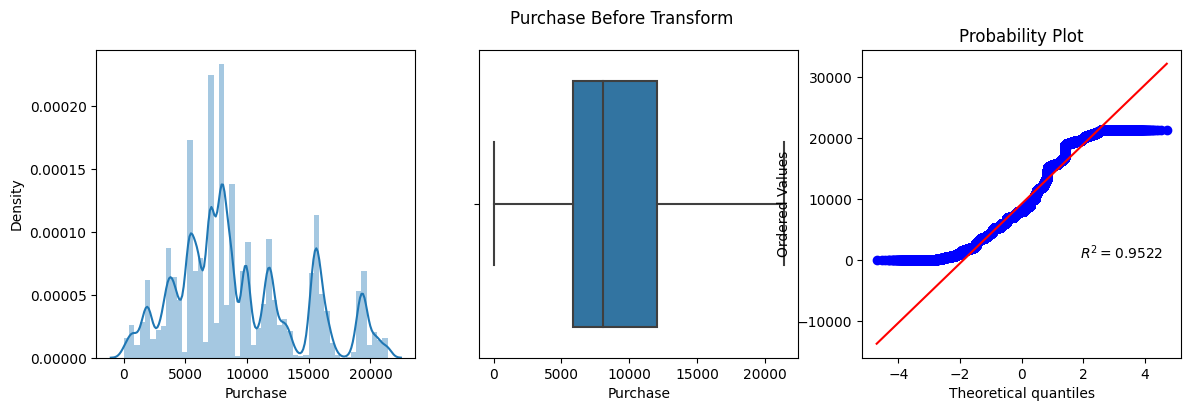

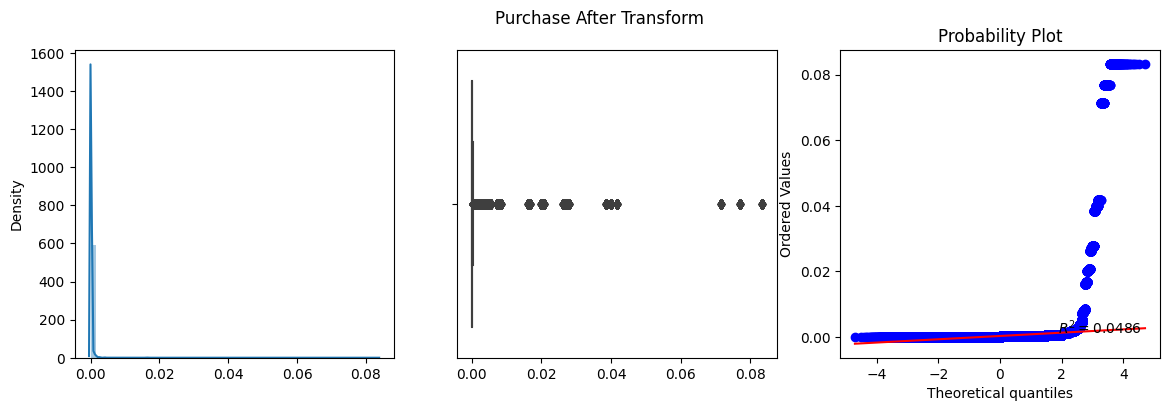

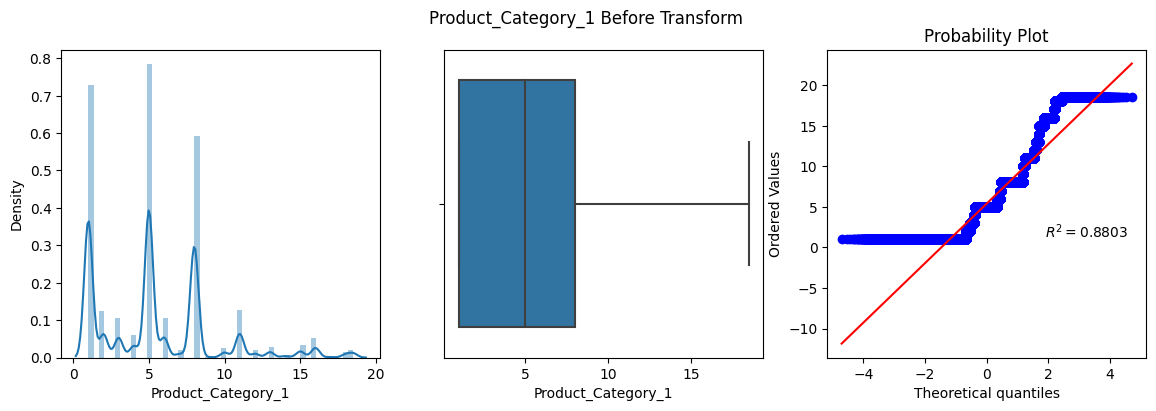

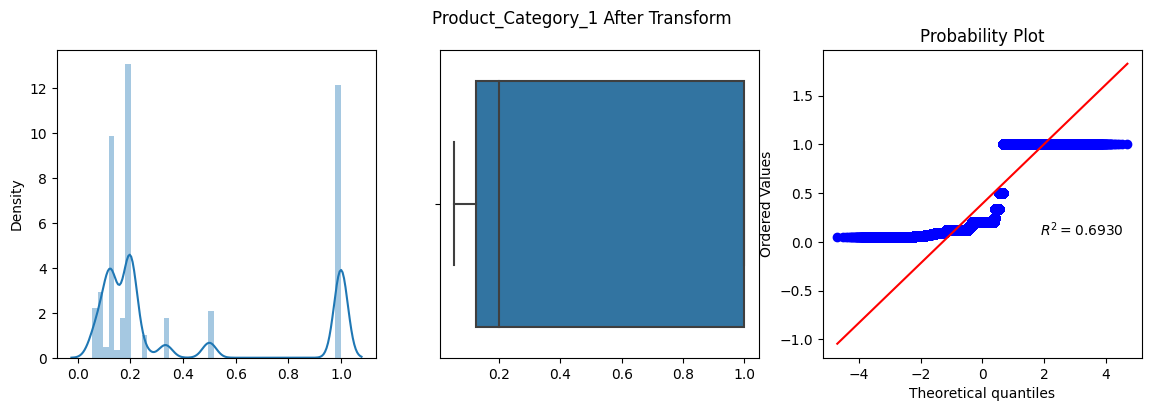

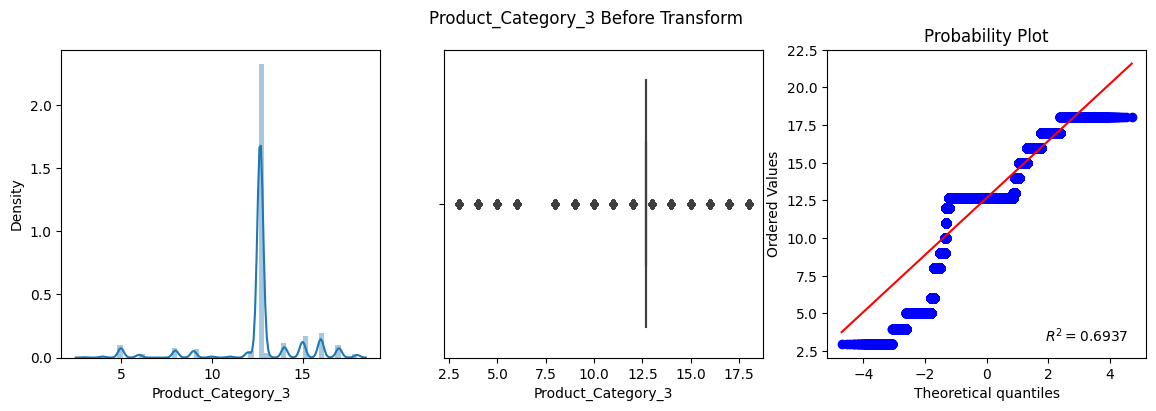

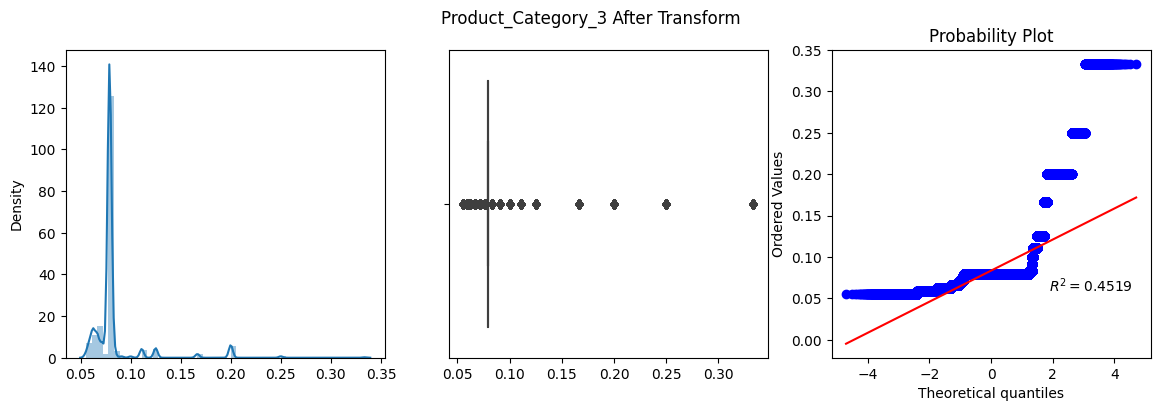

In [26]:
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(FunctionTransformer(lambda x: 1/(x+0.000001)),col)

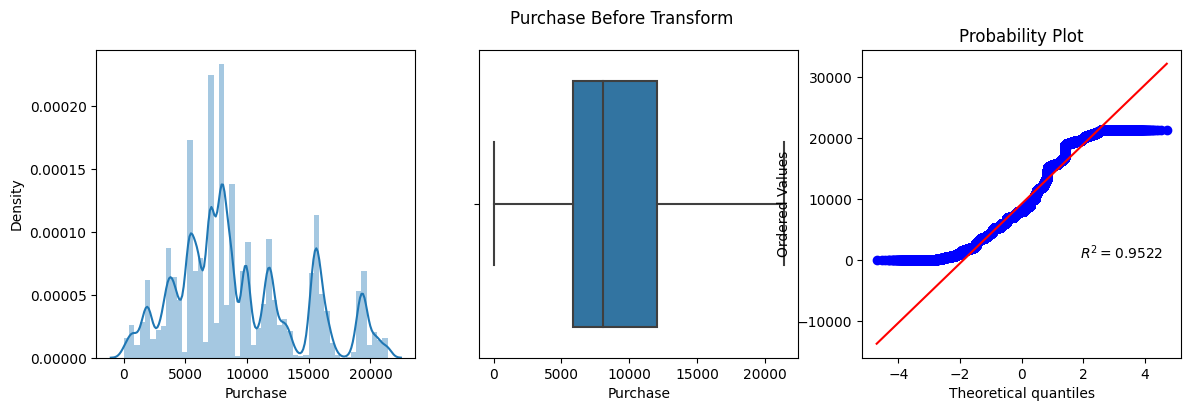

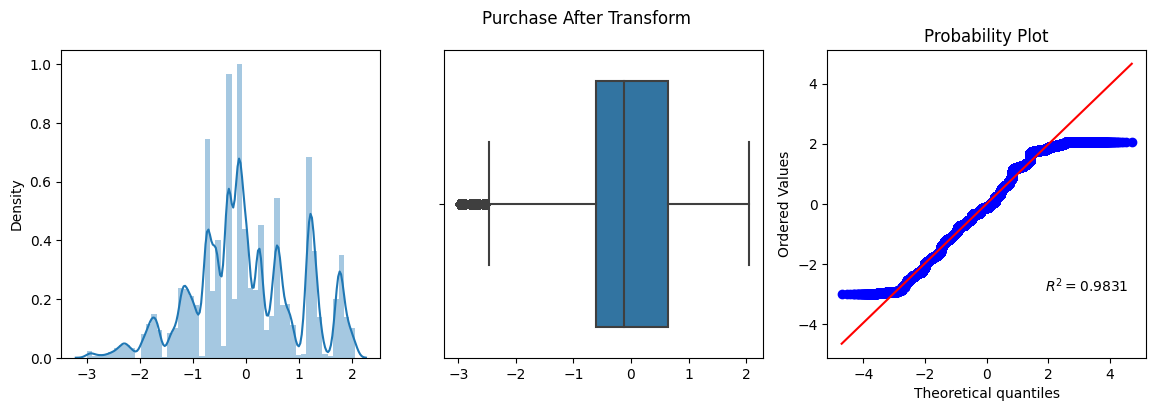

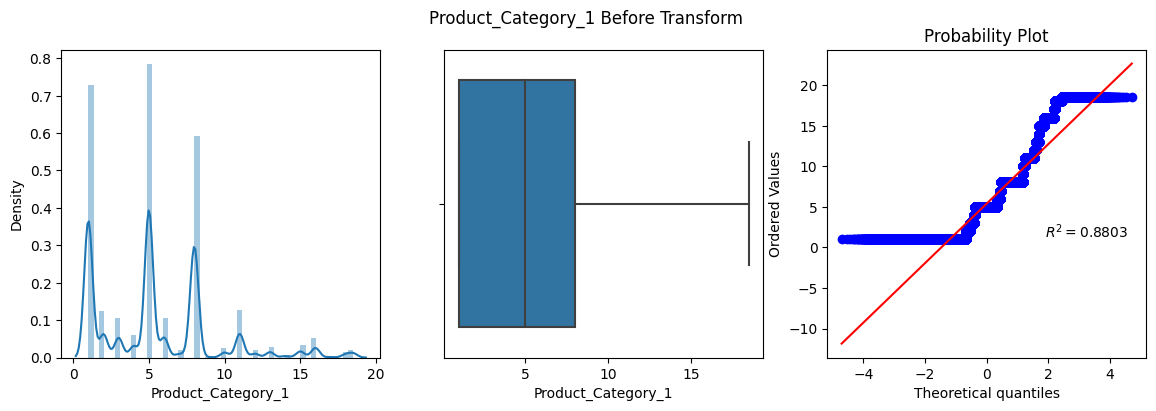

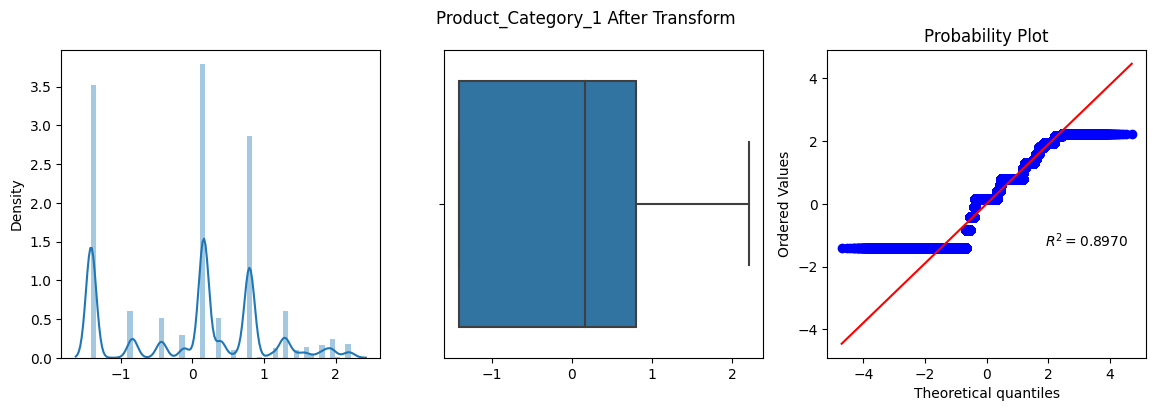

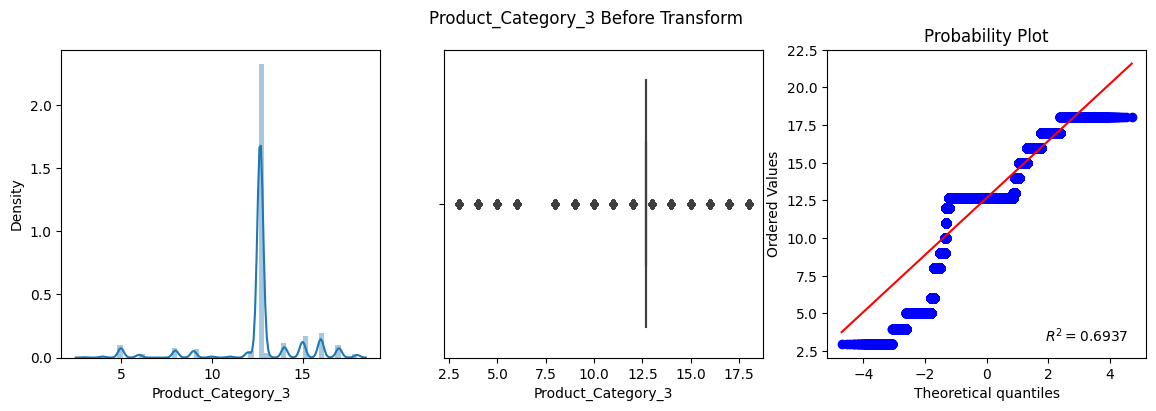

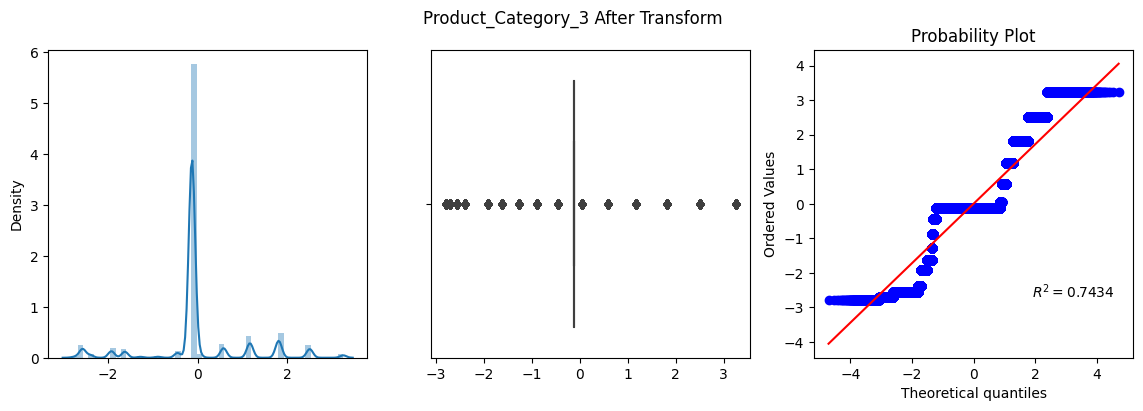

In [27]:
# Applying Box-Cox Transform
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(PowerTransformer(method='box-cox'),col)

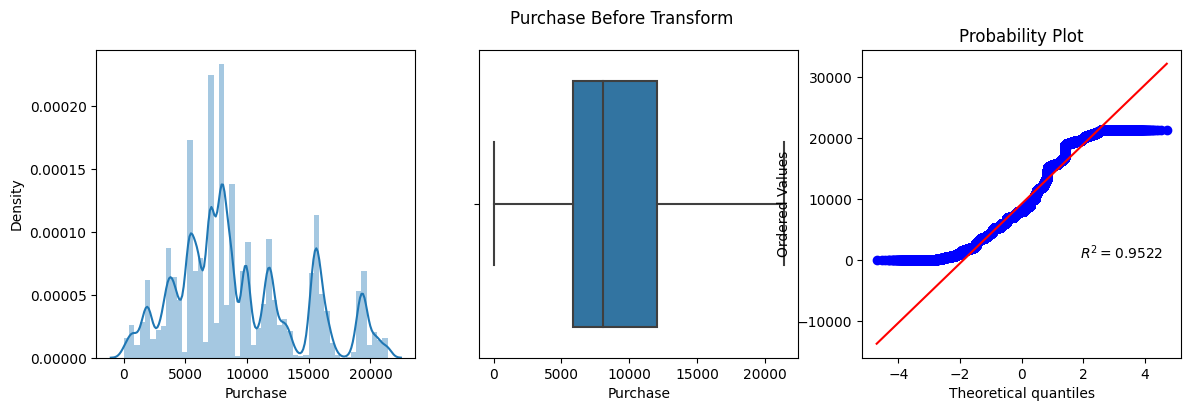

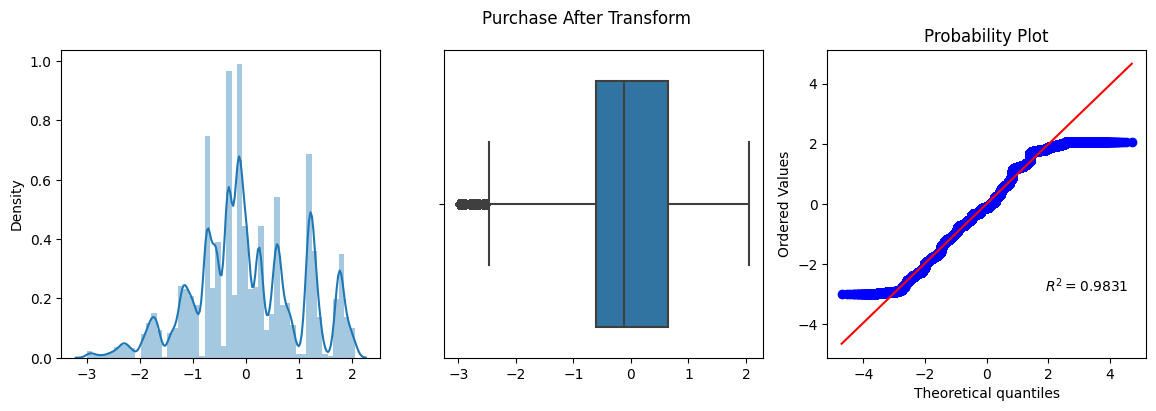

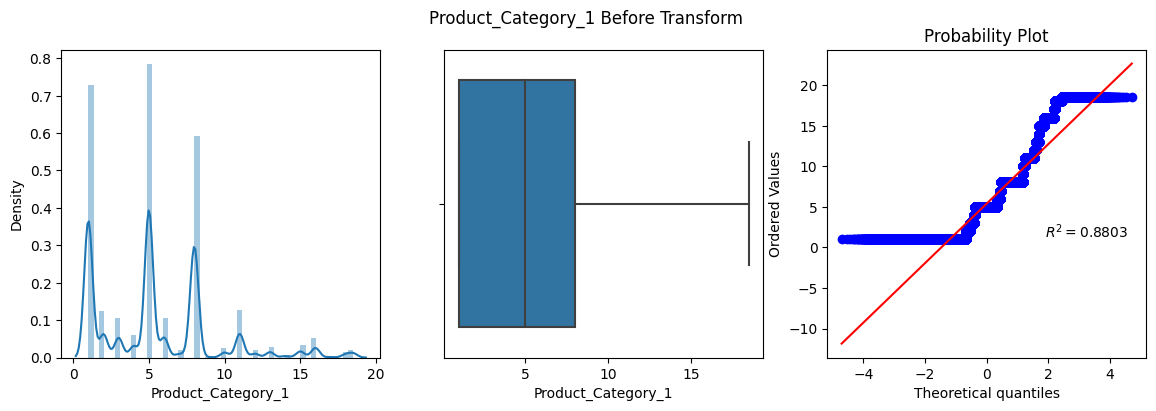

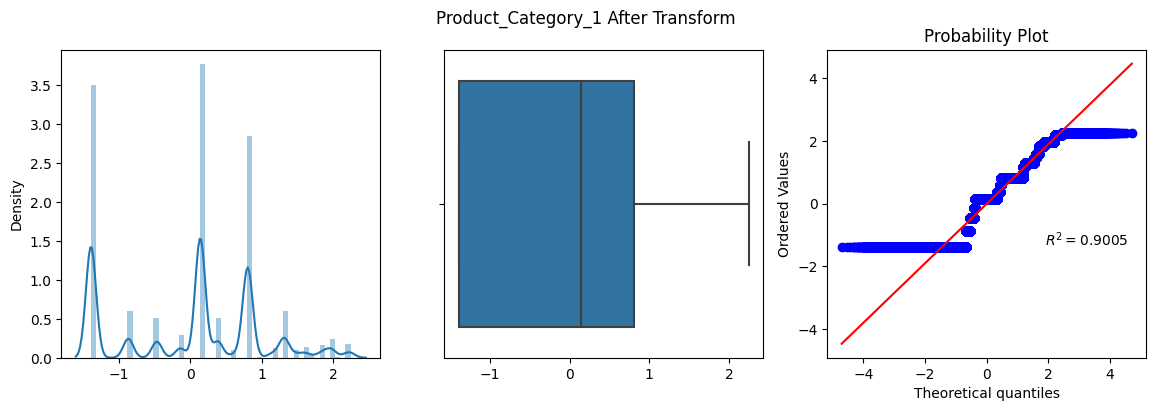

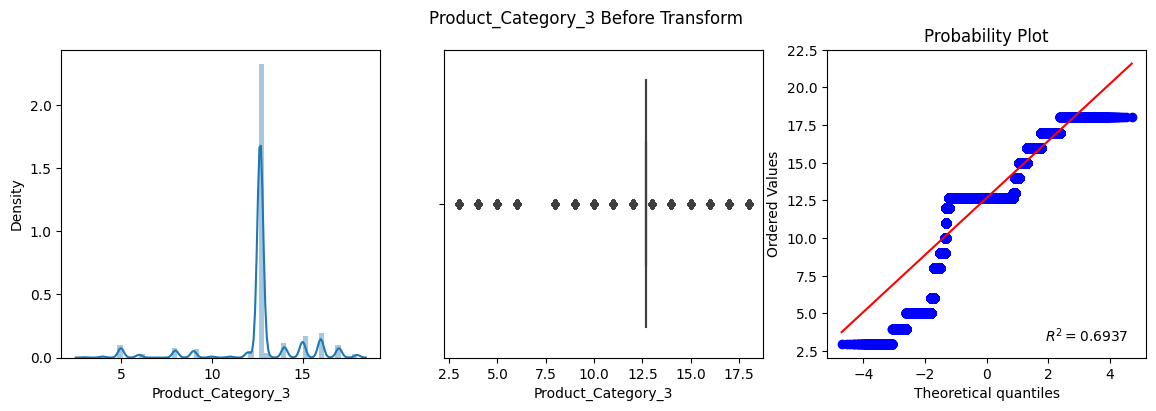

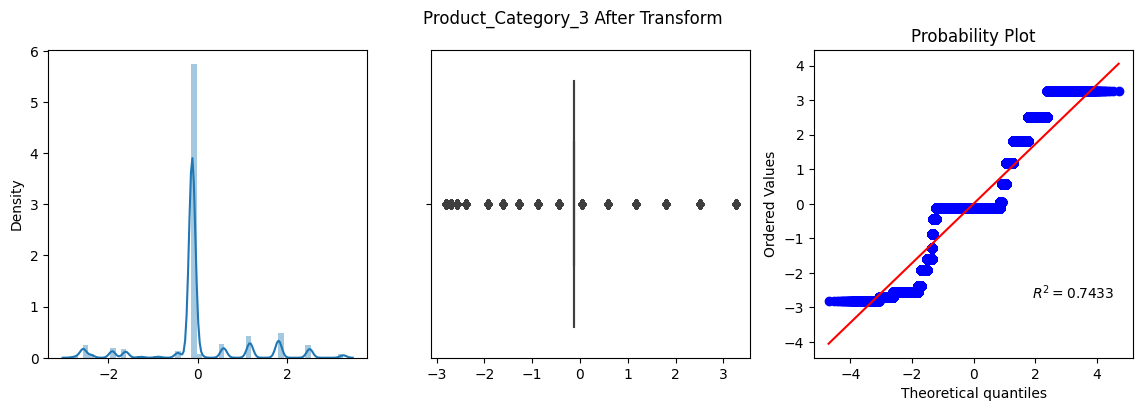

In [28]:
# Applying Yeo-Johnson Transform
skewed_cols = ['Purchase','Product_Category_1','Product_Category_3']

for col in skewed_cols:    
    apply_transform(PowerTransformer(),col)

Power Transform (Box-Cox): Product_Category_3 <br>
Power Transform (Yeo-Johnson): Purchase <br>
Log Transform: None <br>
Reciprocal Transform: None <br>
Square Transform: None <br>
Sqrt Transform: Product_Category_1

In [29]:
pt = PowerTransformer()
train.Purchase = pt.fit_transform(train[['Purchase']])

In [30]:
st = FunctionTransformer(np.sqrt)
train.Product_Category_1 = st.fit_transform(train[['Product_Category_1']])

In [31]:
box_cox_transform = PowerTransformer(method='box-cox')
train.Product_Category_3 = box_cox_transform.fit_transform(train[['Product_Category_3']])

Skewness: 0.0030655518513462644
Kurtosis: -1.1955007812357379


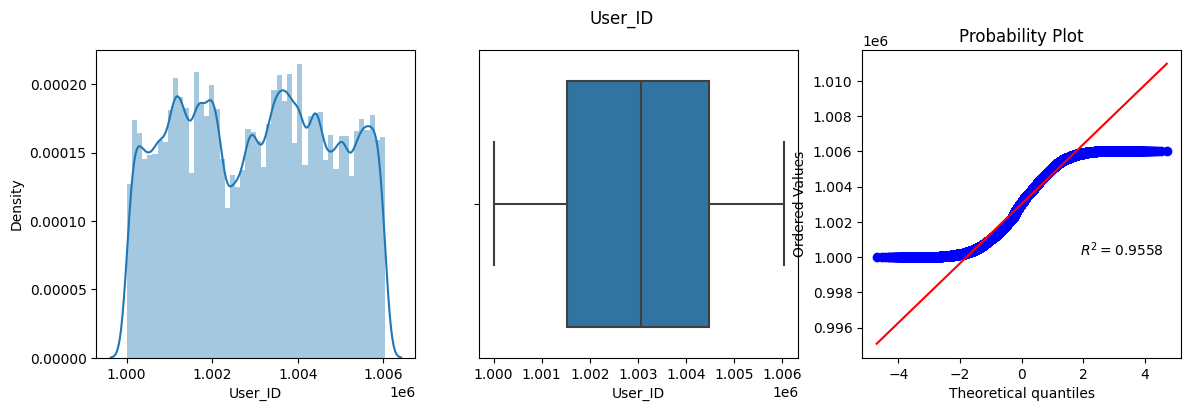

Skewness: 0.40014010986184784
Kurtosis: -1.21611364874086


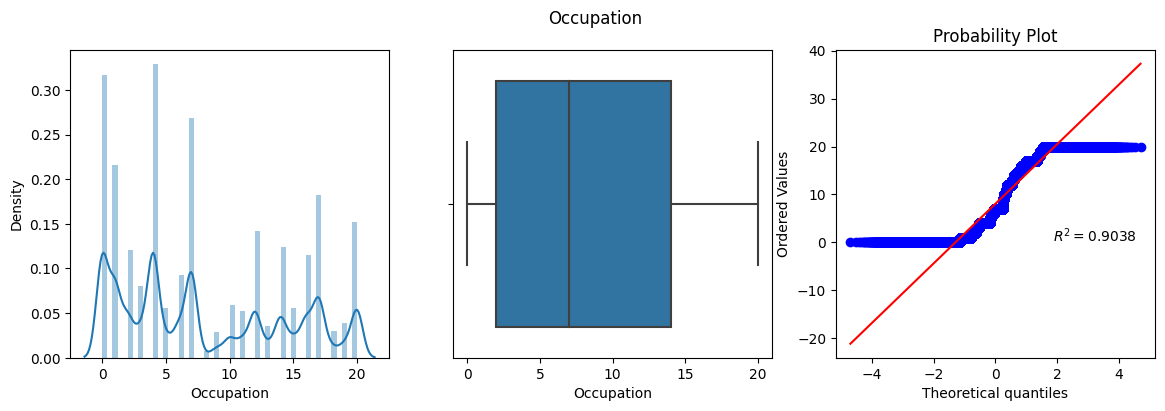

Skewness: 0.3674372854404167
Kurtosis: -1.8649966222489232


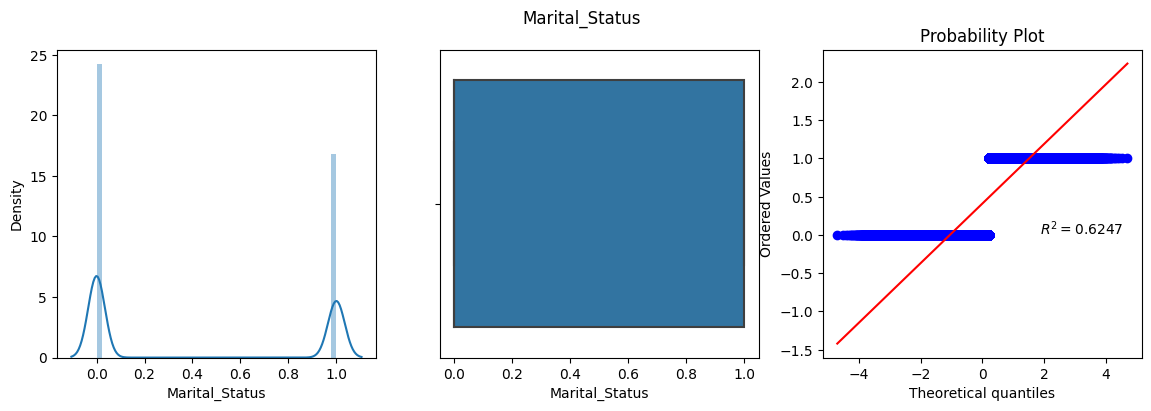

Skewness: 0.13674486545923803
Kurtosis: -0.6728419506381202


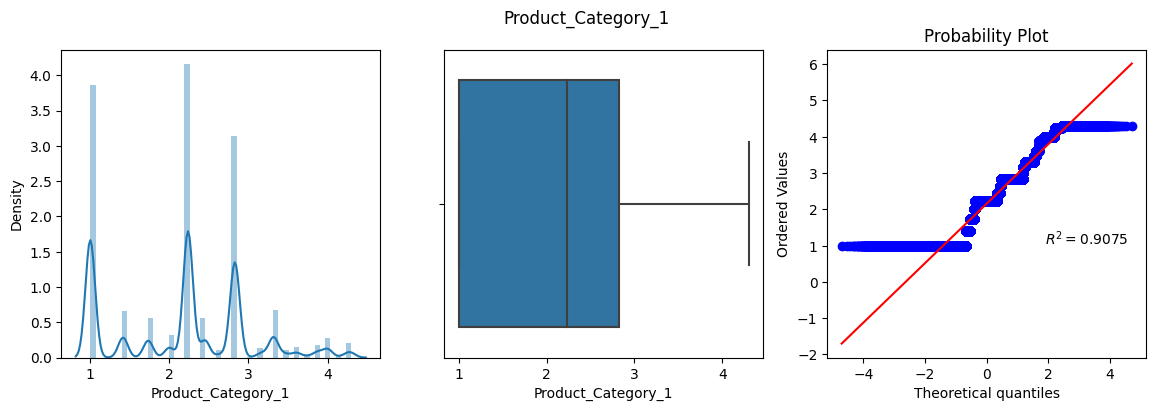

Skewness: -0.19674654415192747
Kurtosis: -0.7091007945191348


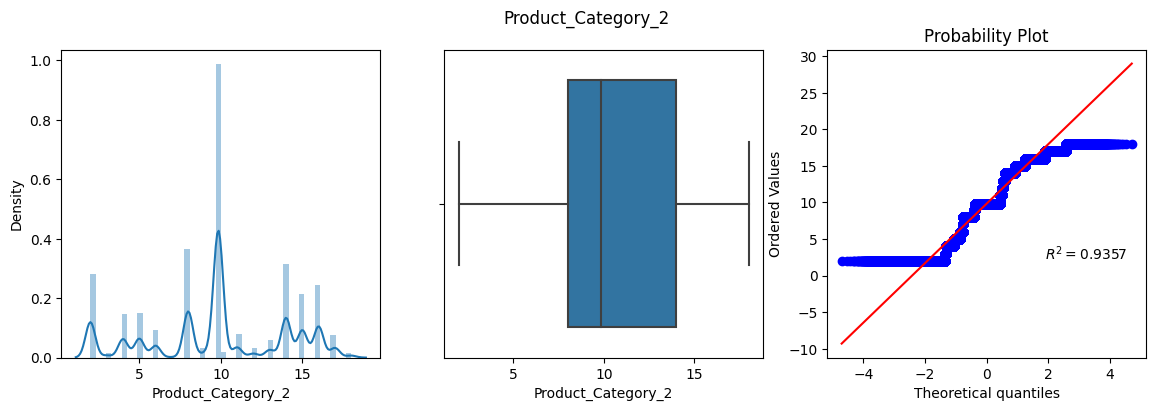

Skewness: 0.2200486348089301
Kurtosis: 2.1892090657986714


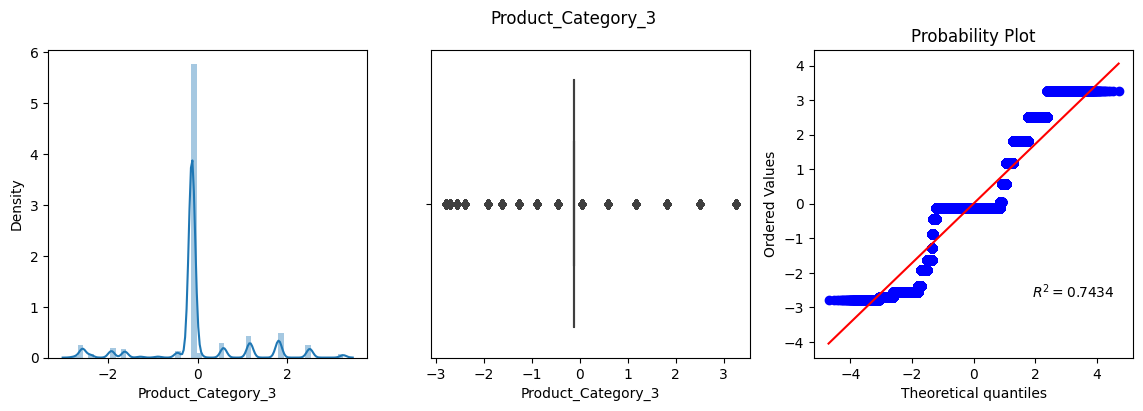

Skewness: -0.03376206852197367
Kurtosis: -0.2756737456256291


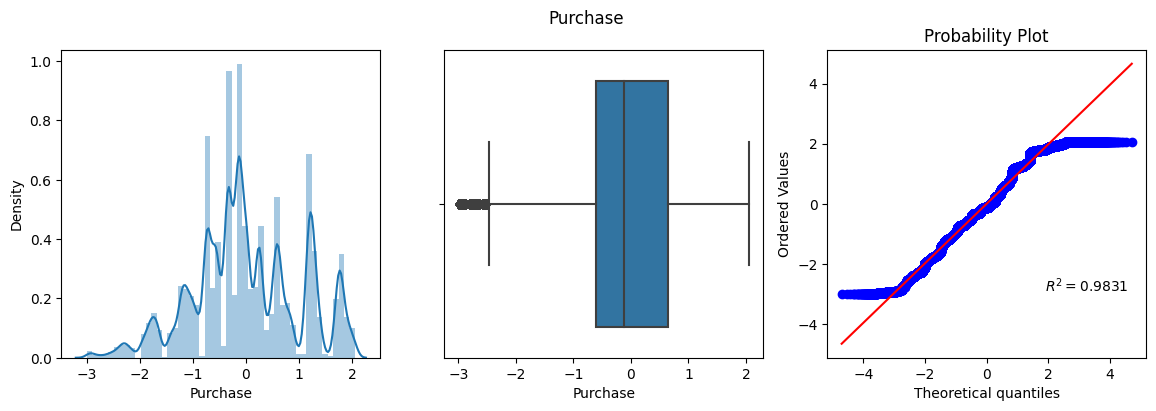

In [32]:
for col in train.select_dtypes(np.number):
        print("Skewness:".format(col),train[col].skew())
        print("Kurtosis:".format(col),train[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(train[col])
        plt.subplot(132)
        sns.boxplot(train[col])
        plt.subplot(133)
        probplot(train[col],rvalue=True,plot=plt)
        plt.suptitle(col)
        plt.show();

### Categorical Encoding

#### Ordinal Encoding the features with only a few categories

In [33]:
train.Product_ID.nunique() / len(train)

0.006601002057927383

In [34]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [35]:
age_encoder = OrdinalEncoder(categories=[['0-17','18-25','26-35','36-45','46-50','51-55','55+']])
train.Age = age_encoder.fit_transform(train[['Age']])

In [36]:
train.Age = train.Age.astype(int)

In [37]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [38]:
city_category_encoder = OrdinalEncoder(categories=[['A','B','C']])
train.City_Category = city_category_encoder.fit_transform(train[['City_Category']])

In [39]:
train.City_Category = train.City_Category.astype(int)

In [40]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
city_stay_years_encoder = OrdinalEncoder(categories=[['0','1','2','3','4+']])
train.Stay_In_Current_City_Years = city_stay_years_encoder.fit_transform(train[['Stay_In_Current_City_Years']])

In [42]:
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.astype(int)

In [43]:
gender_encoder = OrdinalEncoder(categories=[['F','M']])
train.Gender = gender_encoder.fit_transform(train[['Gender']])
train.Gender = train.Gender.astype(int)

#### One Hot Encoding Product_ID feature with high cardinality

In [44]:
product_id_cnts = train.Product_ID.value_counts()
product_id_cnts

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [45]:
threshold = 1000
remaining_categories = product_id_cnts[product_id_cnts <= threshold].index
product_ids_data = pd.get_dummies(train.Product_ID.replace(remaining_categories,'Others'),drop_first=True,sparse=False)
train = pd.concat([train,product_ids_data],axis=1)
train.head()

User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001  P00069042       0    0          10              0   
1  1000001  P00248942       0    0          10              0   
2  1000001  P00087842       0    0          10              0   
3  1000001  P00085442       0    0          10              0   
4  1000002  P00285442       1    6          16              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0            1.732051   
1                           2               0            1.000000   
2                           2               0            3.464102   
3                           2               0            3.464102   
4                           4               0            2.828427   

   Product_Category_2  ...  P00184942  P00220442  P00237542  P00242742  \
0            9.842329  ...          0          0          0          0   
1            6.000000  ...          0          0          0          0   
2            9.842329  ...          0          0          0          0   
3           14.000000  ...          0          0          0          0   
4            9.842329  ...          0          0          0          0   

   P00251242  P00255842  P00265242  P00270942  P00278642  P00334242  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 47 columns]

In [46]:
train.drop('Product_ID',axis=1,inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int32  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int32  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  float64
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  P00000142                   550068 non-null  uint8  
 12  P00010742                   550068 non-null  uint8  
 13  P00025442     

### Feature Splitting

In [48]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

### Feature Selection

In [50]:
kbest = SelectKBest(score_func=f_regression,k=10)
kbest.fit(X_train,y_train)

SelectKBest(score_func=<function f_regression at 0x000002D653D63B50>)

In [51]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['Product_Category_1', 'Product_Category_2', 'P00025442',
       'P00059442', 'P00102642', 'P00110742', 'P00110942', 'P00184942',
       'P00237542', 'P00255842'], dtype=object)

In [52]:
percentile = SelectPercentile(score_func=r_regression,percentile=25)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=25,
                 score_func=<function r_regression at 0x000002D653D63AC0>)

In [53]:
selected_features = percentile.get_feature_names_out()
selected_features

array(['P00025442', 'P00028842', 'P00059442', 'P00080342', 'P00110742',
       'P00110842', 'P00110942', 'P00148642', 'P00184942', 'P00237542',
       'P00255842'], dtype=object)

In [54]:
sfm = SelectFromModel(estimator=Lasso(),max_features=10,threshold='median')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(), max_features=10, threshold='median')

In [55]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],
      dtype=object)

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

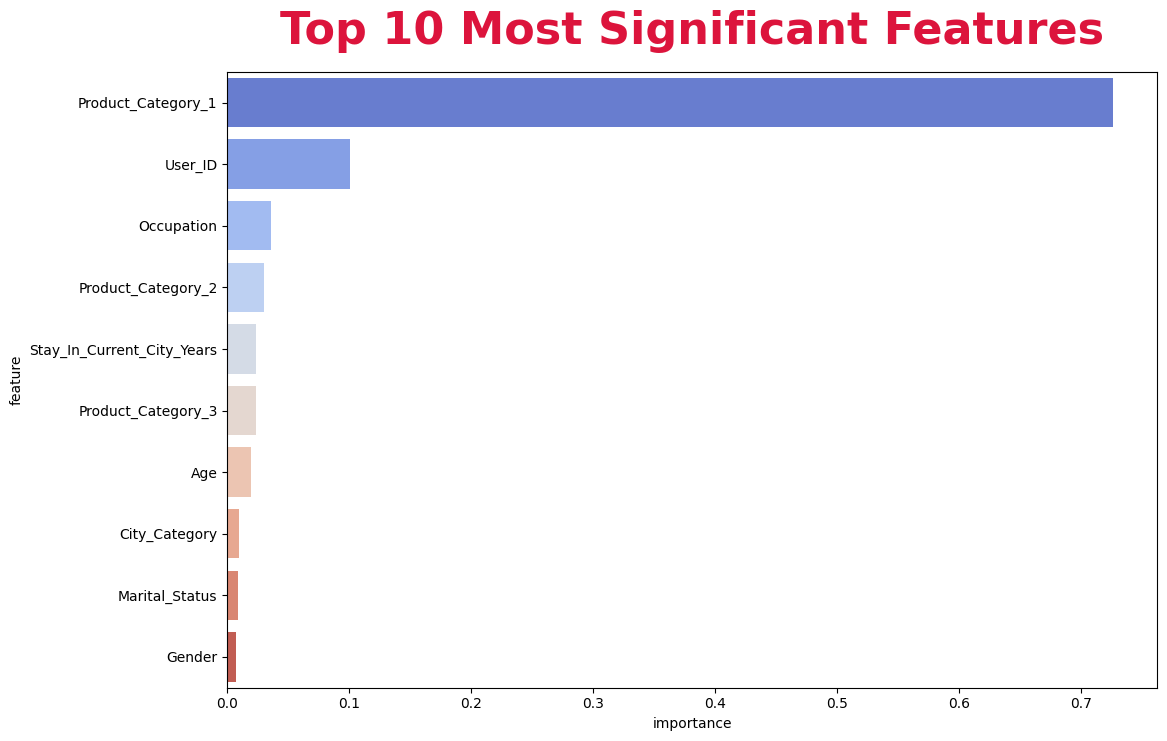

In [57]:
feat_imps = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values('importance',ascending=False).reset_index()
sns.barplot(x='importance',y='feature',data=feat_imps[:10],palette='coolwarm',orient='horizontal')
plt.title('Top 10 Most Significant Features',fontsize=32,fontweight='bold',color='crimson',pad=20);

In [58]:
rfe = RFE(estimator=DecisionTreeRegressor(),n_features_to_select=10,step=2,verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 45 features.
Fitting estimator with 43 features.
Fitting estimator with 41 features.
Fitting estimator with 39 features.
Fitting estimator with 37 features.
Fitting estimator with 35 features.
Fitting estimator with 33 features.
Fitting estimator with 31 features.
Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.


RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10, step=2,
    verbose=1)

In [59]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],
      dtype=object)

Final selected features: User_ID, Gender, Product_Category_1, Product_Category_2, Product_Category_3, Occupation, Age, Stay_In_Current_City_Years, City_Category, Marital_Status

In [60]:
# Saving the original train and test sets with all features
X_train_orig = X_train
X_test_orig = X_test

In [61]:
selected_features = ['User_ID','Gender','Product_Category_1','Product_Category_2','Product_Category_3','Occupation','Age','Stay_In_Current_City_Years','City_Category','Marital_Status']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### Feature Scaling and Normalization

In [62]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)
X_train.head()

User_ID    Gender  Product_Category_1  Product_Category_2  \
0 -1.150879  0.572005            0.089372           -0.438020   
1  0.665463  0.572005           -1.346979           -0.913589   
2  1.694356  0.572005           -1.346979            0.275334   
3  1.393852  0.572005           -1.346979           -0.438020   
4  1.670038  0.572005           -1.346979           -0.913589   

   Product_Category_3  Occupation       Age  Stay_In_Current_City_Years  \
0           -0.123780    0.448026 -0.366457                   -0.665696   
1            1.811159    1.368064  0.372141                    0.110560   
2            1.170506    0.448026  1.110739                    0.110560   
3            2.504494    1.521403  1.110739                    1.663072   
4            1.170506   -1.085370 -0.366457                    0.110560   

   City_Category  Marital_Status  
0       1.259217        1.201445  
1       1.259217       -0.832331  
2      -1.372375        1.201445  
3       1.259217       -0.832331  
4       1.259217       -0.832331

In [63]:
X_test.head()

User_ID    Gender  Product_Category_1  Product_Category_2  \
0  0.403173  0.572005            0.777712            1.702042   
1  0.833375 -1.748236            0.777712            0.988688   
2 -1.230203  0.572005            1.345013            1.464257   
3 -0.539449 -1.748236            0.089372            0.988688   
4 -1.546919  0.572005            0.777712            1.464257   

   Product_Category_3  Occupation       Age  Stay_In_Current_City_Years  \
0            -0.12378   -0.318672  0.372141                    1.663072   
1            -0.12378   -0.318672  1.849336                    0.110560   
2            -0.12378    0.754705  2.587934                    0.110560   
3            -0.12378    1.368064 -0.366457                   -0.665696   
4            -0.12378    1.828083  2.587934                   -1.441953   

   City_Category  Marital_Status  
0      -0.056579       -0.832331  
1       1.259217        1.201445  
2       1.259217        1.201445  
3       1.259217        1.201445  
4       1.259217        1.201445

## Model Training and Evaluation

In [64]:
models = []
mape_scores = []
rmse_scores = []
r2_scores = []

In [65]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print("Mean Absolute Percentage Error:",mape)
    mape_scores.append(mape)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error:",rmse)
    rmse_scores.append(rmse)
    r2 = r2_score(y_test,y_pred)
    print("R2 Score:",r2)
    r2_scores.append(r2)
    models.append(str(model))

In [66]:
train_and_evaluate_model(LinearRegression())

Mean Absolute Percentage Error: 2.8234008250550833
Root Mean Squared Error: 0.892663406287973
R2 Score: 0.20032474031957914


In [67]:
train_and_evaluate_model(PassiveAggressiveRegressor())

Mean Absolute Percentage Error: 14.310156538727036
Root Mean Squared Error: 1.3983747386520378
R2 Score: -0.9623900646180061


In [68]:
train_and_evaluate_model(LassoCV())

Mean Absolute Percentage Error: 2.812867333547169
Root Mean Squared Error: 0.892664185594689
R2 Score: 0.20032334406525076


In [69]:
train_and_evaluate_model(RidgeCV())

Mean Absolute Percentage Error: 2.8233581573545994
Root Mean Squared Error: 0.8926634055078709
R2 Score: 0.2003247417172579


In [70]:
train_and_evaluate_model(ElasticNetCV())

Mean Absolute Percentage Error: 2.8121501826077413
Root Mean Squared Error: 0.8926642822761707
R2 Score: 0.2003231708446166


In [71]:
train_and_evaluate_model(SGDRegressor())

Mean Absolute Percentage Error: 2.7202018625514937
Root Mean Squared Error: 0.8931740126472111
R2 Score: 0.19940964499918323


In [72]:
train_and_evaluate_model(ARDRegression())

Mean Absolute Percentage Error: 2.8297385560973485
Root Mean Squared Error: 0.8927136736891901
R2 Score: 0.20023467562411568


In [73]:
train_and_evaluate_model(RANSACRegressor())

Mean Absolute Percentage Error: 11.936712173922304
Root Mean Squared Error: 1.245035838215126
R2 Score: -0.5556142114505327


In [74]:
train_and_evaluate_model(TweedieRegressor())

Mean Absolute Percentage Error: 2.0143316242632388
Root Mean Squared Error: 0.9181377683924193
R2 Score: 0.1540320647972323


In [75]:
train_and_evaluate_model(HuberRegressor())

Mean Absolute Percentage Error: 3.325187379446081
Root Mean Squared Error: 0.8998930716525829
R2 Score: 0.1873191748327313


In [76]:
train_and_evaluate_model(KNeighborsRegressor())

Mean Absolute Percentage Error: 8.719461644697752
Root Mean Squared Error: 0.7662208462255327
R2 Score: 0.4108225404184672


In [77]:
train_and_evaluate_model(LinearSVR())

Mean Absolute Percentage Error: 3.8023761824714395
Root Mean Squared Error: 0.8991850291168946
R2 Score: 0.18859751831781946


In [78]:
train_and_evaluate_model(DecisionTreeRegressor())

Mean Absolute Percentage Error: 8.496325234246056
Root Mean Squared Error: 0.6688305545412612
R2 Score: 0.5510784987847512


In [79]:
train_and_evaluate_model(RandomForestRegressor())

Mean Absolute Percentage Error: 8.446763523066489
Root Mean Squared Error: 0.5767442604473769
R2 Score: 0.6661858368303517


In [80]:
train_and_evaluate_model(BaggingRegressor())

Mean Absolute Percentage Error: 8.594595292246996
Root Mean Squared Error: 0.5886268374012141
R2 Score: 0.6522890922558543


In [81]:
train_and_evaluate_model(AdaBoostRegressor())

Mean Absolute Percentage Error: 11.01367780559405
Root Mean Squared Error: 0.6927129761062139
R2 Score: 0.5184461685271473


In [82]:
train_and_evaluate_model(GradientBoostingRegressor())

Mean Absolute Percentage Error: 10.125410208044876
Root Mean Squared Error: 0.5793988118363351
R2 Score: 0.6631059063418037


In [83]:
train_and_evaluate_model(HistGradientBoostingRegressor())

Mean Absolute Percentage Error: 9.876981695725544
Root Mean Squared Error: 0.5616787976630642
R2 Score: 0.6833975601880338


In [84]:
train_and_evaluate_model(ExtraTreesRegressor())

Mean Absolute Percentage Error: 8.372041827291929
Root Mean Squared Error: 0.6093903320447405
R2 Score: 0.627325809902322


In [85]:
train_and_evaluate_model(XGBRegressor())

Mean Absolute Percentage Error: 9.51036370349967
Root Mean Squared Error: 0.5457647134984077
R2 Score: 0.7010840411107506


In [86]:
train_and_evaluate_model(MLPRegressor())

Mean Absolute Percentage Error: 9.539762827939755
Root Mean Squared Error: 0.5833922163030351
R2 Score: 0.6584459358340025


In [87]:
train_and_evaluate_model(CatBoostRegressor(silent=True))

Mean Absolute Percentage Error: 9.56680928275904
Root Mean Squared Error: 0.5476492163446818
R2 Score: 0.6990161884230746


In [88]:
train_and_evaluate_model(LGBMRegressor())

Mean Absolute Percentage Error: 9.851481978998917
Root Mean Squared Error: 0.561846711372876
R2 Score: 0.6832082354822013


In [89]:
train_and_evaluate_model(VotingRegressor([
    ('XGB',XGBRegressor()),
    ('HIST',HistGradientBoostingRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('LGBM',LGBMRegressor()),
    ('CAT',CatBoostRegressor(silent=True))
]))

Mean Absolute Percentage Error: 9.77223625121511
Root Mean Squared Error: 0.5558328621173839
R2 Score: 0.6899536407626163


## Baseline Models Performance Comparison

In [90]:
model_perfs = pd.DataFrame({'Model': models, 'MAPE': mape_scores, 'RMSE': rmse_scores, 'R2': r2_scores}).sort_values('R2',ascending=False).reset_index()
model_perfs

index                                              Model       MAPE  \
0      19  XGBRegressor(base_score=None, booster=None, ca...   9.510364   
1      21  <catboost.core.CatBoostRegressor object at 0x0...   9.566809   
2      23  VotingRegressor(estimators=[('XGB',\n         ...   9.772236   
3      17                    HistGradientBoostingRegressor()   9.876982   
4      22                                    LGBMRegressor()   9.851482   
5      13                            RandomForestRegressor()   8.446764   
6      16                        GradientBoostingRegressor()  10.125410   
7      20                                     MLPRegressor()   9.539763   
8      14                                 BaggingRegressor()   8.594595   
9      18                              ExtraTreesRegressor()   8.372042   
10     12                            DecisionTreeRegressor()   8.496325   
11     15                                AdaBoostRegressor()  11.013678   
12     10                              KNeighborsRegressor()   8.719462   
13      3                                          RidgeCV()   2.823358   
14      0                                 LinearRegression()   2.823401   
15      2                                          LassoCV()   2.812867   
16      4                                     ElasticNetCV()   2.812150   
17      6                                    ARDRegression()   2.829739   
18      5                                     SGDRegressor()   2.720202   
19     11                                        LinearSVR()   3.802376   
20      9                                   HuberRegressor()   3.325187   
21      8                                 TweedieRegressor()   2.014332   
22      7                                  RANSACRegressor()  11.936712   
23      1                       PassiveAggressiveRegressor()  14.310157   

        RMSE        R2  
0   0.545765  0.701084  
1   0.547649  0.699016  
2   0.555833  0.689954  
3   0.561679  0.683398  
4   0.561847  0.683208  
5   0.576744  0.666186  
6   0.579399  0.663106  
7   0.583392  0.658446  
8   0.588627  0.652289  
9   0.609390  0.627326  
10  0.668831  0.551078  
11  0.692713  0.518446  
12  0.766221  0.410823  
13  0.892663  0.200325  
14  0.892663  0.200325  
15  0.892664  0.200323  
16  0.892664  0.200323  
17  0.892714  0.200235  
18  0.893174  0.199410  
19  0.899185  0.188598  
20  0.899893  0.187319  
21  0.918138  0.154032  
22  1.245036 -0.555614  
23  1.398375 -0.962390

Among the baseline models, the XGBoost Regressor has produced the best performance by achieving a decent r2 score of more than 70%. It is closely followed by the Cat Boost Regressor which obtained an r2 score of nearly 70%.

## Hyperparameter Optimization and Cross Validation

In [91]:
param_grid = {'n_neighbors': [2,5,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev']
             }
grid_knn = RandomizedSearchCV(KNeighborsRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, weights=uniform; total time= 2.5min
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, weights=uniform; total time= 2.4min
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, weights=uniform; total time= 2.5min
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, weights=uniform; total time= 2.3min
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, weights=uniform; total time= 2.3min
[CV] END algorithm=brute, metric=euclidean, n_neighbors=20, weights=distance; total time=   0.6s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=20, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=20, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=20, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=

In [92]:
grid_knn.best_params_

{'weights': 'distance',
 'n_neighbors': 12,
 'metric': 'minkowski',
 'algorithm': 'kd_tree'}

In [93]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['squared_error','absolute_error','poisson','quantile'],
              'max_bins': np.arange(0,255,50),
              'interaction_cst': ['pairwise','no_interaction']
             }
grid_hgb = RandomizedSearchCV(HistGradientBoostingRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_hgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END interaction_cst=pairwise, learning_rate=1.0, loss=absolute_error, max_bins=100; total time=   2.8s
[CV] END interaction_cst=pairwise, learning_rate=1.0, loss=absolute_error, max_bins=100; total time=   1.9s
[CV] END interaction_cst=pairwise, learning_rate=1.0, loss=absolute_error, max_bins=100; total time=   2.7s
[CV] END interaction_cst=pairwise, learning_rate=1.0, loss=absolute_error, max_bins=100; total time=   2.7s
[CV] END interaction_cst=pairwise, learning_rate=1.0, loss=absolute_error, max_bins=100; total time=   3.4s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, 

In [94]:
grid_hgb.best_params_

{'max_bins': 100,
 'loss': 'absolute_error',
 'learning_rate': 1.0,
 'interaction_cst': 'pairwise'}

In [95]:
param_grid = {'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
              'C': [0.0001,0.001,0.01,0.1,1],
              'epsilon': np.linspace(0.001,1,5)
             }
grid_lsvr = RandomizedSearchCV(LinearSVR(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_lsvr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.001, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END C=0.001, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.8s
[CV] END C=0.001, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END C=0.001, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END C=0.001, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   1.8s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   1.7s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   1.8s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   1.8s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   1.7s
[CV] END ...C=0.01, epsilon=0.5005, loss=epsilon_insensitive; total time=   0.6s
[CV] END

In [96]:
grid_lsvr.best_params_

{'loss': 'squared_epsilon_insensitive', 'epsilon': 0.001, 'C': 1}

In [97]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.7,1],
              'n_estimators': [100,400,700,800,1000]
             }
grid_cat = RandomizedSearchCV(CatBoostRegressor(silent=True),param_grid,verbose=5,cv=5)
train_and_evaluate_model(grid_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.7, n_estimators=700;, score=0.704 total time=  19.3s
[CV 2/5] END learning_rate=0.7, n_estimators=700;, score=0.710 total time=  19.2s
[CV 3/5] END learning_rate=0.7, n_estimators=700;, score=0.701 total time=  20.3s
[CV 4/5] END learning_rate=0.7, n_estimators=700;, score=0.706 total time=  21.2s
[CV 5/5] END learning_rate=0.7, n_estimators=700;, score=0.707 total time=  20.0s
[CV 1/5] END learning_rate=1, n_estimators=1000;, score=0.699 total time=  28.3s
[CV 2/5] END learning_rate=1, n_estimators=1000;, score=0.703 total time=  29.4s
[CV 3/5] END learning_rate=1, n_estimators=1000;, score=0.694 total time=  28.6s
[CV 4/5] END learning_rate=1, n_estimators=1000;, score=0.699 total time=  29.5s
[CV 5/5] END learning_rate=1, n_estimators=1000;, score=0.699 total time=  28.9s
[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.691 total time=   3.8s
[CV 2/5] END learning_rate=0.5, n_estimato

In [98]:
grid_cat.best_params_

{'n_estimators': 1000, 'learning_rate': 0.4}

In [99]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
'learning_rate': np.linspace(0,1,6)[1:],
'n_estimators': [100,300,500,800,1000],
'importance_type': ['split','gain'],
'min_split_gain': [0.68,0.79,0.87,1]}
grid_lgbm = RandomizedSearchCV(LGBMRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=gbdt, importance_type=split, learning_rate=1.0, min_split_gain=1, n_estimators=500;, score=0.686 total time=   2.3s
[CV 2/5] END boosting_type=gbdt, importance_type=split, learning_rate=1.0, min_split_gain=1, n_estimators=500;, score=0.692 total time=   2.2s
[CV 3/5] END boosting_type=gbdt, importance_type=split, learning_rate=1.0, min_split_gain=1, n_estimators=500;, score=0.683 total time=   1.5s
[CV 4/5] END boosting_type=gbdt, importance_type=split, learning_rate=1.0, min_split_gain=1, n_estimators=500;, score=0.687 total time=   1.2s
[CV 5/5] END boosting_type=gbdt, importance_type=split, learning_rate=1.0, min_split_gain=1, n_estimators=500;, score=0.684 total time=   2.0s
[CV 1/5] END boosting_type=rf, importance_type=split, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=100;, score=nan total time=   0.3s
[CV 2/5] END boosting_type=rf, importance_type=split, learning_rate=0.

In [100]:
grid_lgbm.best_params_

{'n_estimators': 500,
 'min_split_gain': 1,
 'learning_rate': 1.0,
 'importance_type': 'split',
 'boosting_type': 'gbdt'}

In [ ]:
param_grid = {'n_estimators': [100,400,700,900,1000],
'grow_policy': [0,1],
'learning_rate': [0.1,0.4,0.6,0.8,1],
'booster': ['gbtree','gblinear','dart'],
'sampling_method': ['uniform','gradient_based'],
'importance_type': ['gain','weight','cover','total_gain','total_cover']
}

grid_xgb = RandomizedSearchCV(XGBRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_xgb)

In [ ]:
grid_xgb.best_params_

In [104]:
param_grid = {'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
'penalty': ['l2', 'l1', 'elasticnet'],
'l1_ratio': [0.15,0.45,0.68,0.81,0.97],
'alpha': [0.0001,0.001,0.01,0.1,1],
'shuffle': [True,False],
'learning_rate': ['adaptive','constant','optimal','invscaling'],
'epsilon': np.linspace(0.001,100,10),
'average': [True,False]
}
grid_sgd = RandomizedSearchCV(SGDRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_sgd)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.001, average=False, epsilon=55.55599999999999, l1_ratio=0.81, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet, shuffle=True;, score=-0.000 total time=   0.4s
[CV 2/5] END alpha=0.001, average=False, epsilon=55.55599999999999, l1_ratio=0.81, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet, shuffle=True;, score=-0.000 total time=   0.3s
[CV 3/5] END alpha=0.001, average=False, epsilon=55.55599999999999, l1_ratio=0.81, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet, shuffle=True;, score=-0.000 total time=   0.3s
[CV 4/5] END alpha=0.001, average=False, epsilon=55.55599999999999, l1_ratio=0.81, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet, shuffle=True;, score=-0.000 total time=   0.3s
[CV 5/5] END alpha=0.001, average=False, epsilon=55.55599999999999, l1_ratio=0.81, learning_rate=invscaling, loss=epsilon_insensiti

[CV 1/5] END alpha=1, average=True, epsilon=88.889, l1_ratio=0.45, learning_rate=constant, loss=huber, penalty=l1, shuffle=True;, score=-25400275.322 total time=   0.4s
[CV 2/5] END alpha=1, average=True, epsilon=88.889, l1_ratio=0.45, learning_rate=constant, loss=huber, penalty=l1, shuffle=True;, score=-25838165.254 total time=   0.4s
[CV 3/5] END alpha=1, average=True, epsilon=88.889, l1_ratio=0.45, learning_rate=constant, loss=huber, penalty=l1, shuffle=True;, score=-25502413.758 total time=   0.4s
[CV 4/5] END alpha=1, average=True, epsilon=88.889, l1_ratio=0.45, learning_rate=constant, loss=huber, penalty=l1, shuffle=True;, score=-25637219.163 total time=   0.4s
[CV 5/5] END alpha=1, average=True, epsilon=88.889, l1_ratio=0.45, learning_rate=constant, loss=huber, penalty=l1, shuffle=True;, score=-25582429.714 total time=   0.4s
Mean Absolute Percentage Error: 2.82223803400594
Root Mean Squared Error: 0.8926630101569394
R2 Score: 0.20032545005208235


In [105]:
grid_sgd.best_params_

{'shuffle': True,
 'penalty': 'l2',
 'loss': 'huber',
 'learning_rate': 'invscaling',
 'l1_ratio': 0.15,
 'epsilon': 77.77799999999999,
 'average': True,
 'alpha': 0.0001}

In [106]:
param_grid = {'epsilon': np.linspace(1,10,10),
'alpha': np.linspace(0.0001,10,10)}
grid_huber = RandomizedSearchCV(HuberRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_huber)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........alpha=2.2223, epsilon=4.0;, score=0.202 total time=   0.6s
[CV 2/5] END .........alpha=2.2223, epsilon=4.0;, score=0.199 total time=   0.4s
[CV 3/5] END .........alpha=2.2223, epsilon=4.0;, score=0.200 total time=   0.4s
[CV 4/5] END .........alpha=2.2223, epsilon=4.0;, score=0.200 total time=   0.4s
[CV 5/5] END .........alpha=2.2223, epsilon=4.0;, score=0.197 total time=   0.4s
[CV 1/5] END .........alpha=5.5556, epsilon=5.0;, score=0.202 total time=   0.4s
[CV 2/5] END .........alpha=5.5556, epsilon=5.0;, score=0.199 total time=   0.4s
[CV 3/5] END .........alpha=5.5556, epsilon=5.0;, score=0.200 total time=   0.4s
[CV 4/5] END .........alpha=5.5556, epsilon=5.0;, score=0.200 total time=   0.5s
[CV 5/5] END .........alpha=5.5556, epsilon=5.0;, score=0.197 total time=   0.4s
[CV 1/5] END .........alpha=5.5556, epsilon=6.0;, score=0.202 total time=   0.4s
[CV 2/5] END .........alpha=5.5556, epsilon=6.0;

In [107]:
grid_huber.best_params_

{'epsilon': 7.0, 'alpha': 8.8889}

In [108]:
param_grid = {'link': ['auto', 'identity', 'log'],
'solver': ['lbfgs', 'newton-cholesky'],
'alpha': np.linspace(0.0001,10,10)}
grid_tweedie = RandomizedSearchCV(TweedieRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_tweedie)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=6.6667, link=identity, solver=newton-cholesky;, score=0.055 total time=   0.2s
[CV 2/5] END alpha=6.6667, link=identity, solver=newton-cholesky;, score=0.054 total time=   0.0s
[CV 3/5] END alpha=6.6667, link=identity, solver=newton-cholesky;, score=0.055 total time=   0.0s
[CV 4/5] END alpha=6.6667, link=identity, solver=newton-cholesky;, score=0.055 total time=   0.0s
[CV 5/5] END alpha=6.6667, link=identity, solver=newton-cholesky;, score=0.054 total time=   0.0s
[CV 1/5] END alpha=4.4445, link=auto, solver=newton-cholesky;, score=0.074 total time=   0.0s
[CV 2/5] END alpha=4.4445, link=auto, solver=newton-cholesky;, score=0.073 total time=   0.0s
[CV 3/5] END alpha=4.4445, link=auto, solver=newton-cholesky;, score=0.073 total time=   0.0s
[CV 4/5] END alpha=4.4445, link=auto, solver=newton-cholesky;, score=0.073 total time=   0.1s
[CV 5/5] END alpha=4.4445, link=auto, solver=newton-cholesky;, score=0.07

In [109]:
grid_tweedie.best_params_

{'solver': 'newton-cholesky', 'link': 'identity', 'alpha': 0.0001}

In [110]:
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
'epsilon': np.linspace(0.001,1,5),
'shuffle': [True,False],
'average': [True,False]}
grid_pa = RandomizedSearchCV(PassiveAggressiveRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_pa)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.1, average=False, epsilon=1.0, loss=epsilon_insensitive, shuffle=False;, score=-0.014 total time=   0.2s
[CV 2/5] END C=0.1, average=False, epsilon=1.0, loss=epsilon_insensitive, shuffle=False;, score=-0.014 total time=   0.2s
[CV 3/5] END C=0.1, average=False, epsilon=1.0, loss=epsilon_insensitive, shuffle=False;, score=-0.013 total time=   0.1s
[CV 4/5] END C=0.1, average=False, epsilon=1.0, loss=epsilon_insensitive, shuffle=False;, score=-0.013 total time=   0.0s
[CV 5/5] END C=0.1, average=False, epsilon=1.0, loss=epsilon_insensitive, shuffle=False;, score=-0.199 total time=   0.1s
[CV 1/5] END C=10, average=True, epsilon=0.001, loss=squared_epsilon_insensitive, shuffle=True;, score=0.196 total time=   0.3s
[CV 2/5] END C=10, average=True, epsilon=0.001, loss=squared_epsilon_insensitive, shuffle=True;, score=0.193 total time=   0.3s
[CV 3/5] END C=10, average=True, epsilon=0.001, loss=squared_epsilon_inse

In [111]:
grid_pa.best_params_

{'shuffle': True,
 'loss': 'squared_epsilon_insensitive',
 'epsilon': 0.5005,
 'average': True,
 'C': 1}

In [112]:
param_grid = {
'eps': [0.0001,0.001,0.01,0.1,1],
'positive': [True,False],
'selection': ['cyclic','random']
}
grid_lasso = RandomizedSearchCV(LassoCV(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_lasso)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END eps=0.1, positive=True, selection=random;, score=0.003 total time=   1.6s
[CV 2/5] END eps=0.1, positive=True, selection=random;, score=0.003 total time=   1.4s
[CV 3/5] END eps=0.1, positive=True, selection=random;, score=0.003 total time=   1.4s
[CV 4/5] END eps=0.1, positive=True, selection=random;, score=0.003 total time=   1.4s
[CV 5/5] END eps=0.1, positive=True, selection=random;, score=0.003 total time=   1.4s
[CV 1/5] END eps=1, positive=True, selection=cyclic;, score=-0.000 total time=   1.4s
[CV 2/5] END eps=1, positive=True, selection=cyclic;, score=-0.000 total time=   1.4s
[CV 3/5] END eps=1, positive=True, selection=cyclic;, score=-0.000 total time=   1.4s
[CV 4/5] END eps=1, positive=True, selection=cyclic;, score=-0.000 total time=   1.4s
[CV 5/5] END eps=1, positive=True, selection=cyclic;, score=-0.000 total time=   1.4s
[CV 1/5] END eps=0.01, positive=True, selection=cyclic;, score=0.009 total

In [113]:
grid_lasso.best_params_

{'selection': 'random', 'positive': False, 'eps': 0.0001}

In [114]:
param_grid = {
'alphas': [(0.1, 1.0, 10.0),(0.01,0.1,1),(0.001,0.01,0.1)],
'gcv_mode': ['auto', 'svd', 'eigen'],
'store_cv_values': [True,False],
'alpha_per_target': [True,False]
}
grid_ridge = RandomizedSearchCV(RidgeCV(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha_per_target=True, alphas=(0.1, 1.0, 10.0), gcv_mode=auto, store_cv_values=False;, score=0.202 total time=   0.4s
[CV 2/5] END alpha_per_target=True, alphas=(0.1, 1.0, 10.0), gcv_mode=auto, store_cv_values=False;, score=0.199 total time=   0.2s
[CV 3/5] END alpha_per_target=True, alphas=(0.1, 1.0, 10.0), gcv_mode=auto, store_cv_values=False;, score=0.200 total time=   0.2s
[CV 4/5] END alpha_per_target=True, alphas=(0.1, 1.0, 10.0), gcv_mode=auto, store_cv_values=False;, score=0.200 total time=   0.3s
[CV 5/5] END alpha_per_target=True, alphas=(0.1, 1.0, 10.0), gcv_mode=auto, store_cv_values=False;, score=0.197 total time=   0.2s
[CV 1/5] END alpha_per_target=False, alphas=(0.1, 1.0, 10.0), gcv_mode=eigen, store_cv_values=True;, score=nan total time=   0.0s
[CV 2/5] END alpha_per_target=False, alphas=(0.1, 1.0, 10.0), gcv_mode=eigen, store_cv_values=True;, score=nan total time=   0.0s
[CV 3/5] END alpha_per_t

In [115]:
grid_ridge.best_params_

{'store_cv_values': False,
 'gcv_mode': 'auto',
 'alphas': (0.1, 1.0, 10.0),
 'alpha_per_target': True}

In [116]:
param_grid = {'selection': ['cyclic','random'],
'l1_ratio': [0.1,0.3,0.5,0.8,1],
'positive': [True,False]}
grid_elasticnet = RandomizedSearchCV(ElasticNetCV(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_elasticnet)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......l1_ratio=0.8, positive=True, selection=cyclic; total time=   1.5s
[CV] END ......l1_ratio=0.8, positive=True, selection=cyclic; total time=   1.4s
[CV] END ......l1_ratio=0.8, positive=True, selection=cyclic; total time=   1.4s
[CV] END ......l1_ratio=0.8, positive=True, selection=cyclic; total time=   1.4s
[CV] END ......l1_ratio=0.8, positive=True, selection=cyclic; total time=   1.4s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   1.5s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   1.4s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   1.5s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   1.6s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   1.5s
[CV] END ......l1_ratio=0.8, positive=True, selection=random; total time=   1.5s
[CV] END ......l1_ratio=0.8, positive=True, sele

In [117]:
grid_elasticnet.best_params_

{'selection': 'random', 'positive': False, 'l1_ratio': 1}

In [118]:
param_grid = {'alpha_1': [1e-5,1e-6,1e-7,1e-8],
'alpha_2': [1e-5,1e-6,1e-7,1e-8],
'lambda_1': [1e-5,1e-6,1e-7,1e-8],
'lambda_2': [1e-5,1e-6,1e-7,1e-8],
'fit_intercept': [True,False],
'compute_score': [True,False]}
grid_ard = RandomizedSearchCV(ARDRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ard)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_1=1e-07, alpha_2=1e-05, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=1e-07, alpha_2=1e-05, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=1e-07, alpha_2=1e-05, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=1e-07, alpha_2=1e-05, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=1e-07, alpha_2=1e-05, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-06; total time=   0.2s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=

In [119]:
grid_ard.best_params_

{'lambda_2': 1e-05,
 'lambda_1': 1e-07,
 'fit_intercept': False,
 'compute_score': True,
 'alpha_2': 1e-06,
 'alpha_1': 1e-08}

In [120]:
param_grid = {'fit_intercept': [True,False],
'positive': [True,False]}
grid_lr = RandomizedSearchCV(LinearRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.1s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.1s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.3s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.1s
[CV] END .................fit_intercept=True, positive=False; total time=   0.2s
[CV] END .................fit_intercept=True, positive=False; total time=   0.1s
[CV] END .................fit_intercept=True, positive=False; total time=   0.2s
[CV] END .................fit_intercept=True, positive=False; total time=   0.1s
[CV] END .................fit_intercept=True, positive=False; total time=   0.1s
[CV] END .................fit_intercept=False, positive=True; total time=   0.1s
[CV] END .................fit_intercept=False, po

In [121]:
grid_lr.best_params_

{'positive': False, 'fit_intercept': False}

## Optimized Models Performance Comparison

In [123]:
model_perfs = pd.DataFrame({'model': models, 'MAPE': mape_scores, 'RMSE': rmse_scores, 'R2': r2_scores}).sort_values('R2',ascending=False).reset_index()
model_perfs

index                                              model       MAPE  \
0      27  RandomizedSearchCV(cv=5,\n                   e...   9.178925   
1      19  XGBRegressor(base_score=None, booster=None, ca...   9.510364   
2      21  <catboost.core.CatBoostRegressor object at 0x0...   9.566809   
3      23  VotingRegressor(estimators=[('XGB',\n         ...   9.772236   
4      28  RandomizedSearchCV(cv=5, estimator=LGBMRegress...   9.676186   
5      17                    HistGradientBoostingRegressor()   9.876982   
6      22                                    LGBMRegressor()   9.851482   
7      25  RandomizedSearchCV(cv=5, estimator=HistGradien...   8.077690   
8      13                            RandomForestRegressor()   8.446764   
9      16                        GradientBoostingRegressor()  10.125410   
10     20                                     MLPRegressor()   9.539763   
11     14                                 BaggingRegressor()   8.594595   
12     18                              ExtraTreesRegressor()   8.372042   
13     12                            DecisionTreeRegressor()   8.496325   
14     15                                AdaBoostRegressor()  11.013678   
15     24  RandomizedSearchCV(cv=5, estimator=KNeighborsR...   8.127304   
16     10                              KNeighborsRegressor()   8.719462   
17     37  RandomizedSearchCV(cv=5, estimator=LinearRegre...   2.811122   
18     29  RandomizedSearchCV(cv=5, estimator=SGDRegresso...   2.822238   
19     33  RandomizedSearchCV(cv=5, estimator=LassoCV(),\...   2.822344   
20     30  RandomizedSearchCV(cv=5, estimator=HuberRegres...   2.823415   
21     31  RandomizedSearchCV(cv=5, estimator=TweedieRegr...   2.823237   
22     34  RandomizedSearchCV(cv=5, estimator=RidgeCV(),\...   2.823358   
23      3                                          RidgeCV()   2.823358   
24      0                                 LinearRegression()   2.823401   
25     26  RandomizedSearchCV(cv=5, estimator=LinearSVR()...   2.823790   
26      2                                          LassoCV()   2.812867   
27     35  RandomizedSearchCV(cv=5, estimator=ElasticNetC...   2.812860   
28      4                                     ElasticNetCV()   2.812150   
29     36  RandomizedSearchCV(cv=5, estimator=ARDRegressi...   2.817650   
30      6                                    ARDRegression()   2.829739   
31      5                                     SGDRegressor()   2.720202   
32     32  RandomizedSearchCV(cv=5, estimator=PassiveAggr...   3.082931   
33     11                                        LinearSVR()   3.802376   
34      9                                   HuberRegressor()   3.325187   
35      8                                 TweedieRegressor()   2.014332   
36      7                                  RANSACRegressor()  11.936712   
37      1                       PassiveAggressiveRegressor()  14.310157   

        RMSE        R2  
0   0.538501  0.708988  
1   0.545765  0.701084  
2   0.547649  0.699016  
3   0.555833  0.689954  
4   0.559983  0.685306  
5   0.561679  0.683398  
6   0.561847  0.683208  
7   0.571788  0.671898  
8   0.576744  0.666186  
9   0.579399  0.663106  
10  0.583392  0.658446  
11  0.588627  0.652289  
12  0.609390  0.627326  
13  0.668831  0.551078  
14  0.692713  0.518446  
15  0.734465  0.458647  
16  0.766221  0.410823  
17  0.892660  0.200331  
18  0.892663  0.200325  
19  0.892663  0.200325  
20  0.892663  0.200325  
21  0.892663  0.200325  
22  0.892663  0.200325  
23  0.892663  0.200325  
24  0.892663  0.200325  
25  0.892664  0.200325  
26  0.892664  0.200323  
27  0.892664  0.200323  
28  0.892664  0.200323  
29  0.892710  0.200241  
30  0.892714  0.200235  
31  0.893174  0.199410  
32  0.895549  0.195147  
33  0.899185  0.188598  
34  0.899893  0.187319  
35  0.918138  0.154032  
36  1.245036 -0.555614  
37  1.398375 -0.962390

In [125]:
model_perfs.iloc[0]['model']

"RandomizedSearchCV(cv=5,\n                   estimator=<catboost.core.CatBoostRegressor object at 0x000002D60CBAC1C0>,\n                   param_distributions={'learning_rate': [0.2, 0.4, 0.5, 0.7,\n                                                          1],\n                                        'n_estimators': [100, 400, 700, 800,\n                                                         1000]},\n                   verbose=5)"

## Deep Learning using Artificial Neural Networks (ANN)

In [158]:
ann = Sequential()
ann.add(Dense(units=32,activation='relu',input_shape=(X_train.shape[1],)))
ann.add(Dense(units=64,activation='relu'))
ann.add(Dropout(0.1))
ann.add(Dense(units=128,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(units=256,activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(units=1))
ann.compile(loss='mean_squared_error',optimizer='adam',metrics=RSquare())
ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                352       
                                                                 
 dense_32 (Dense)            (None, 64)                2112      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dropout_20 (Dropout)        (None, 256)              

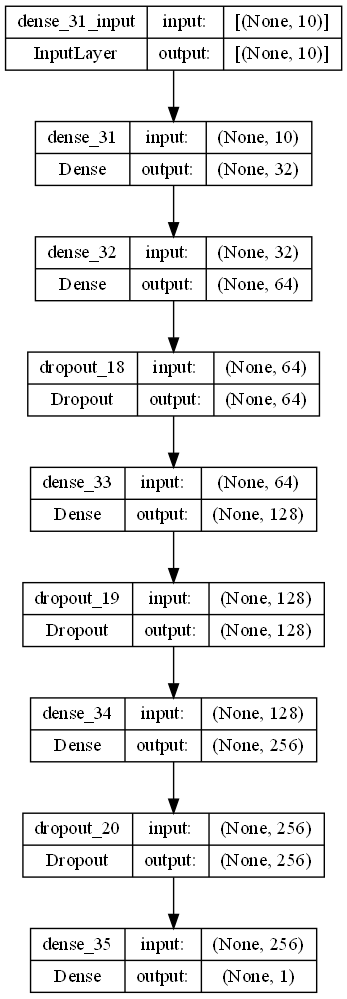

In [159]:
plot_model(ann,'ann.png',show_shapes=True,dpi=100,show_layer_names=True)

In [163]:
es = EarlyStopping(monitor='val_r_square',mode='max',patience=20,verbose=1,restore_best_weights=True,start_from_epoch=60)
rl = ReduceLROnPlateau(monitor='val_r_square',mode='max',patience=20,factor=0.1,min_lr=1e-3,verbose=1)
mc = ModelCheckpoint('black_friday_sales_predictor.h5',monitor='val_r_square',mode='max',verbose=1,save_best_only=True)

r = ann.fit(X_train,
           y_train,
           epochs=100,
           batch_size=32,
           callbacks=[es,mc,rl],
           validation_data=(X_test,y_test))

Epoch 1/100
12032/12033 [============================>.] - ETA: 0s - loss: 0.5752 - r_square: 0.4256
Epoch 1: val_r_square improved from -inf to 0.44221, saving model to black_friday_sales_predictor.h5
12033/12033 [==============================] - 32s 3ms/step - loss: 0.5753 - r_square: 0.4256 - val_loss: 0.5558 - val_r_square: 0.4422 - lr: 0.0010
Epoch 2/100
12025/12033 [============================>.] - ETA: 0s - loss: 0.4716 - r_square: 0.5292
Epoch 2: val_r_square improved from 0.44221 to 0.62176, saving model to black_friday_sales_predictor.h5
12033/12033 [==============================] - 33s 3ms/step - loss: 0.4715 - r_square: 0.5292 - val_loss: 0.3769 - val_r_square: 0.6218 - lr: 0.0010
Epoch 3/100
12026/12033 [============================>.] - ETA: 0s - loss: 0.3860 - r_square: 0.6145
Epoch 3: val_r_square improved from 0.62176 to 0.62972, saving model to black_friday_sales_predictor.h5
12033/12033 [==============================] - 33s 3ms/step - loss: 0.3860 - r_square: 0.6

Epoch 27/100
12029/12033 [============================>.] - ETA: 0s - loss: 0.3525 - r_square: 0.6480
Epoch 27: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 43s 4ms/step - loss: 0.3525 - r_square: 0.6480 - val_loss: 0.3697 - val_r_square: 0.6290 - lr: 0.0010
Epoch 28/100
12032/12033 [============================>.] - ETA: 0s - loss: 0.3515 - r_square: 0.6490
Epoch 28: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 45s 4ms/step - loss: 0.3515 - r_square: 0.6490 - val_loss: 0.3611 - val_r_square: 0.6376 - lr: 0.0010
Epoch 29/100
12031/12033 [============================>.] - ETA: 0s - loss: 0.3516 - r_square: 0.6489
Epoch 29: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 44s 4ms/step - loss: 0.3516 - r_square: 0.6490 - val_loss: 0.3619 - val_r_square: 0.6368 - lr: 0.0010
Epoch 30/100
12030/12033 [============================>.] - ETA: 0s - loss: 0.3505 - r_squa

12032/12033 [============================>.] - ETA: 0s - loss: 0.3498 - r_square: 0.6507
Epoch 54: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 40s 3ms/step - loss: 0.3498 - r_square: 0.6507 - val_loss: 0.3735 - val_r_square: 0.6252 - lr: 0.0010
Epoch 55/100
12023/12033 [============================>.] - ETA: 0s - loss: 0.3495 - r_square: 0.6511
Epoch 55: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 42s 3ms/step - loss: 0.3494 - r_square: 0.6511 - val_loss: 0.3717 - val_r_square: 0.6270 - lr: 0.0010
Epoch 56/100
12013/12033 [============================>.] - ETA: 0s - loss: 0.3485 - r_square: 0.6520
Epoch 56: val_r_square did not improve from 0.64504
12033/12033 [==============================] - 38s 3ms/step - loss: 0.3485 - r_square: 0.6520 - val_loss: 0.3731 - val_r_square: 0.6256 - lr: 0.0010
Epoch 57/100
12023/12033 [============================>.] - ETA: 0s - loss: 0.3506 - r_square: 0.6499
Ep

Epoch 81/100
12016/12033 [============================>.] - ETA: 0s - loss: 0.3487 - r_square: 0.6518
Epoch 81: val_r_square did not improve from 0.64824
12033/12033 [==============================] - 44s 4ms/step - loss: 0.3487 - r_square: 0.6518 - val_loss: 0.3544 - val_r_square: 0.6443 - lr: 0.0010
Epoch 82/100
12017/12033 [============================>.] - ETA: 0s - loss: 0.3477 - r_square: 0.6528
Epoch 82: val_r_square did not improve from 0.64824
12033/12033 [==============================] - 42s 4ms/step - loss: 0.3477 - r_square: 0.6528 - val_loss: 0.3570 - val_r_square: 0.6417 - lr: 0.0010
Epoch 83/100
12019/12033 [============================>.] - ETA: 0s - loss: 0.3485 - r_square: 0.6521
Epoch 83: val_r_square did not improve from 0.64824
12033/12033 [==============================] - 41s 3ms/step - loss: 0.3485 - r_square: 0.6521 - val_loss: 0.3713 - val_r_square: 0.6274 - lr: 0.0010
Epoch 84/100
12031/12033 [============================>.] - ETA: 0s - loss: 0.3486 - r_squa

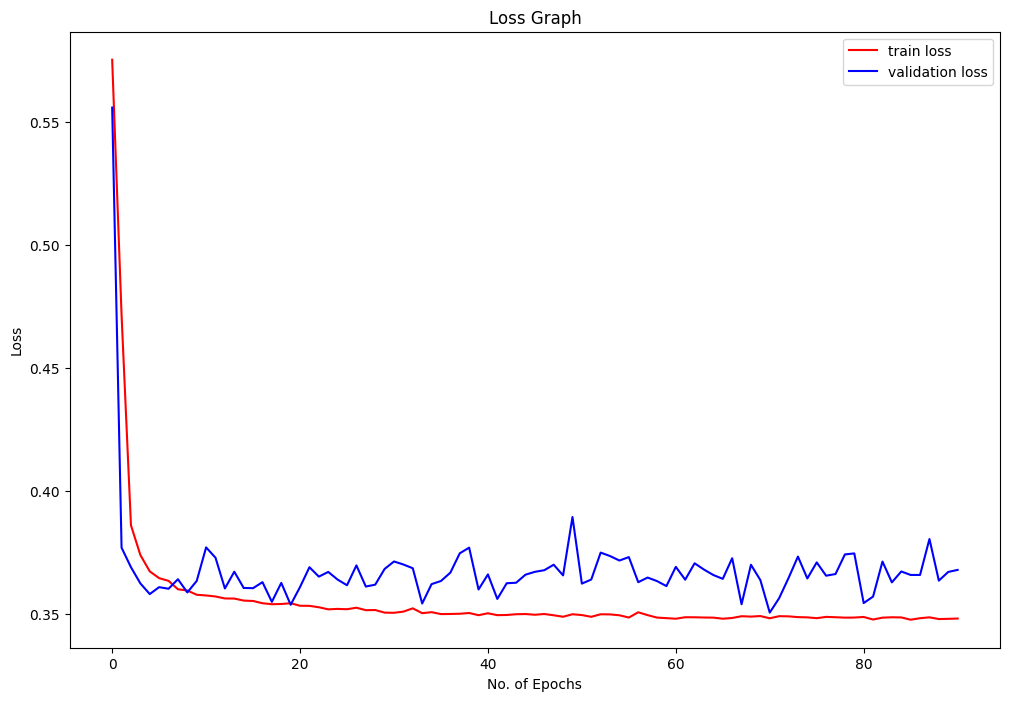

In [164]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

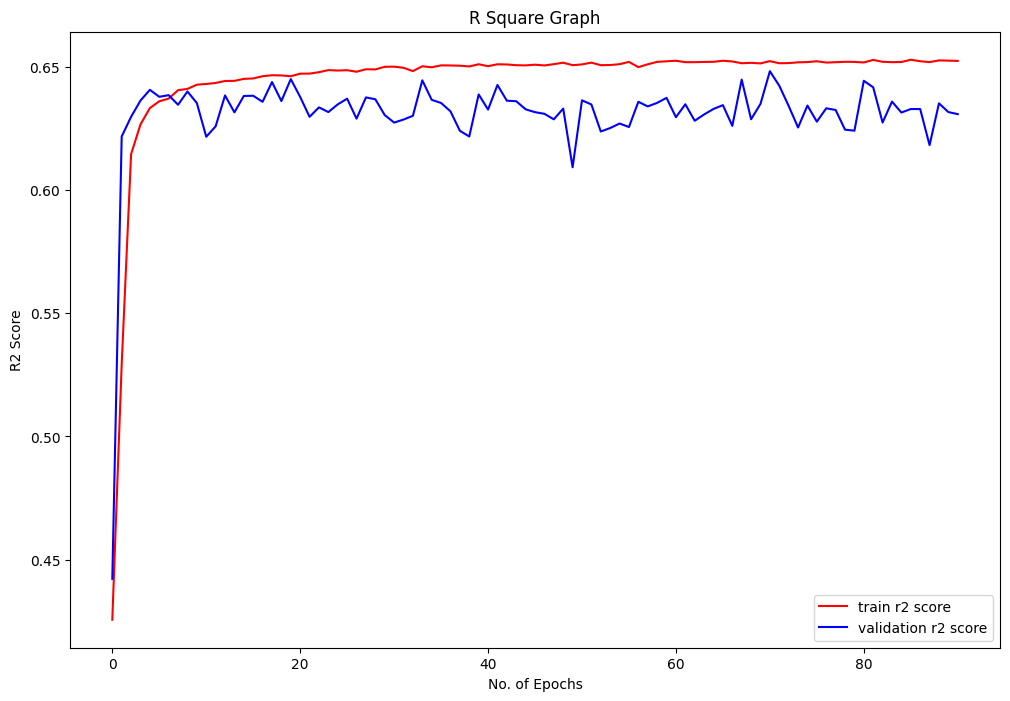

In [165]:
plt.plot(r.history['r_square'],'r',label='train r2 score')
plt.plot(r.history['val_r_square'],'b',label='validation r2 score')
plt.xlabel('No. of Epochs')
plt.ylabel('R2 Score')
plt.title('R Square Graph')
plt.legend();

In [166]:
loss, r2 = ann.evaluate(X_test,y_test)
print("Validation Loss:",loss)
print("Validation R2 Score:",r2)

5157/5157 [==============================] - 7s 1ms/step - loss: 0.3505 - r_square: 0.6482
Validation Loss: 0.35051849484443665
Validation R2 Score: 0.6482372879981995


## Saving the best performing model for future use

In [168]:
y_pred = grid_cat.predict(X_test)
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.7089881504192195


In [170]:
joblib.dump(grid_cat,'model.h5')

['model.h5']

In [171]:
model = joblib.load('model.h5')
model

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002D606DFC670>,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.5, 0.7,
                                                          1],
                                        'n_estimators': [100, 400, 700, 800,
                                                         1000]},
                   verbose=5)